# Trabalho Prático AMMD - 16/10/2023

## Equipe:  
- Daniel Santiago da Silva - 21950879 - Engenharia da Computação
- Thiago Wesley Cunha de Oliveira  - 21950084 - Engenharia da Computação
- Vinicius Farias Silva - 21950519 - Engenharia da Computação

## Objetivo

Este trabalho tem como objetivo a aplicação dos conhecimentos obtidos na disciplina de Aprendizagem de Máquina e Mineração de Dados até então para o desenvolvimento de três modelos de aprendizagem de máquina: a Árvore de Decisão, o k-NN (k Nearest Neighbors) e o Naive Bayes. Além da implementação da funcionalidade básica, os modelos tiveram funções extras adicionadas para sua melhora na eficiência. Todos foram implementados a partir do material base fornecido pelo professor e utilizando principalmente as bibliotecas Numpy e Pandas, com um pequeno auxilio do Sklearn para divisão do conjunto de dados, comparação com o modelo disponibilizado e avaliação das métricas.

## Implementação

As funções e bibliotecas utilizadas por todas as implementações serão criadas e importadas abaixo, bem como as preparação dos conjuntos de testes.

#### Observação importante:

Tempo de execução inteira do notebook nessa máquina foi de x segundos.  
Os valores de percentual de redução de tempo e desempenho são referente a execução do notebook de maneira local em um computador equipado com o seguinte hardware utilizando o CPU para o processamento ao invés dos CUDA cores da GPU:
- 32 GB a 3000 Mhz de memória ram
- Processador Ryzen 5 5600 stock
- GPU RTX 3070 stock
- HD 1TB 7200 RPM  
- Versão Python 3.11.4
- Versão sklearn 1.3.0
- Versão Pandas 1.5.3
- Versão Numpy 1.24.3

### Importações

As bibliotecas utilizadas serão:

- `numpy` : para auxiliar na criação da classe da Árvore de Decisão;
- `pandas`: exibir os dados tabulados;
- `sklearn`: utilizar o modelo já implementado para comparação de resultados, as funções de métricas e a codificação dos dados de treinamento e teste;
- `pyplot`: biblioteca para gerar gráficos;
- `math`: biblioteca para cálculos matemáticos;

In [95]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
import time

### Funções Auxiliares

Aqui temos uma função auxiliar utilizada na avaliação dos modelos.

In [2]:
def avaliacao(Y_pred: np.ndarray, Y_val: np.ndarray):
    """
    Função que recebe dois vetores de classes e imprime sua matriz de confusão, as principais métricas de avaliação,
    bem como a sua acurácia.
    :param Y_pred: recebe um array de rótulos produzidos pelo modelo
    :param Y_val: recebe um array de rótulos corretos
    """

    print(confusion_matrix(Y_val,Y_pred))
    print(classification_report(Y_val,Y_pred))  
    print("Acurácia: {} %".format(accuracy_score(Y_val, Y_pred)*100))

### Pré-processamento dos conjuntos de dados

<div style=" text-align: justify;">
Um árvore de decisão é um algoritmo de apredizagem de máquina bastante conhecido e utilizado para predição em problemas de classificação e de regressão. No presente trabalho iremos implementar um algoritmo que executa a classificação de instâncias que possuem somente atributos categóricos, atributos mistos (categóricos e numéricos) e somente numéricos. Além disso será feita uma implementação do algoritmo utilizando apenas as funções do Numpy para comparar performance.
<div>

Ao todo serão utilizados 5 Datasets para os testes do modelo e comparação com o modelo implementado pelo `sklearn`. Alguns conjuntos serão atribuidos uma variável `NomeConjuntoDadosPD` contendo o DataFrame dos exemplos para o treinamento no k-NN e Naive Bayes enquanto outra variável conterá o _array_ desses exemplos para o treinamento da Árvore de Decisão.

- **Base Play Tennis**: O primeiro será o dataset "_Play Tennis_" que será utilizado para mostrar como o modelo lida tanto com atributos categoricos, quanto com atributos categóricos codificados numéricamente. São 14 exemplos, sendo 9 da classe 'Sim' e 5 da classe 'Não'.

- **Base Play Tennis Numérica**: Este dataset possui os mesmos exemplos do anterior, exceto pelos atributos "_Tempeture_" e "_Humidity_" serem numéricos. São 14 exemplos, sendo 9 da classe 'Sim' e 5 da classe 'Não'.

- **Base Iris**: É um dataset bastante conhecido já existente no `sklearn`, possui 4 atributos numéricos. Além disso, possui uma maior quantidade de exemplos, sendo 150 no total, com 50 sendo da classe 'Versicolor', 50 da classe 'Setosa' e 50 da classe 'Virginica'.

- **Base Wine**: É um também um dataset já existente no `sklearn`, possui 13 atributos numéricos. São 178 exemplos no total, com 59 sendo da classe 'class_0', 71 da classe 'class_1' e 48 da classe 'class_2'. Seu uso tem como objetivo testar o modelo para um número maior de atributos bem como lidar com um certo desbalanceamento dos dados.

- **Base Breast Cancer**: É um um dataset já existente no `sklearn`, possui 30 atributos numéricos. São 569 exemplos no total, com 212 sendo da classe 'Malignant' e 357 da classe 'Benign'. Essa base possui ainda mais exemplos e atributos e será utilizada para testar além da acurácia do modelo, o seu tempo de processamento.

##### Criando e chamando os datasets utilizados

##### Play Tennis

In [3]:
values = [['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']]
columnsOrig = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis']
tenis = pd.DataFrame(values, columns=columnsOrig)
tenis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
xtennis = tenis.iloc[:, :-1].values
xtennisPD = tenis.iloc[:, :-1]
ytennis = tenis["Play Tennis"].values
ytennisPD = tenis["Play Tennis"]
xtennis, ytennis

(array([['Sunny', 'Hot', 'High', 'Weak'],
        ['Sunny', 'Hot', 'High', 'Strong'],
        ['Overcast', 'Hot', 'High', 'Weak'],
        ['Rain', 'Mild', 'High', 'Weak'],
        ['Rain', 'Cool', 'Normal', 'Weak'],
        ['Rain', 'Cool', 'Normal', 'Strong'],
        ['Overcast', 'Cool', 'Normal', 'Strong'],
        ['Sunny', 'Mild', 'High', 'Weak'],
        ['Sunny', 'Cool', 'Normal', 'Weak'],
        ['Rain', 'Mild', 'Normal', 'Weak'],
        ['Sunny', 'Mild', 'Normal', 'Strong'],
        ['Overcast', 'Mild', 'High', 'Strong'],
        ['Overcast', 'Hot', 'Normal', 'Weak'],
        ['Rain', 'Mild', 'High', 'Strong']], dtype=object),
 array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'Yes', 'Yes', 'Yes', 'No'], dtype=object))

Codificação numérica da base utilizando o `Ordinal_Encoder` e `Label_Encoder`

In [5]:
tennis_feat = ['Outlook','Temperature','Humidity','Wind']
enc = OrdinalEncoder()
enc.fit(xtennis)
XTennisEnc = enc.transform(xtennis)

lb = LabelEncoder()
XTennisEncPD = tenis[tennis_feat].copy()
columns = XTennisEncPD.columns
for i in columns:
    XTennisEncPD[i] = lb.fit_transform(XTennisEncPD[i])
YTennisEncPD = tenis['Play Tennis']

encLabel = LabelEncoder()
encLabel.fit(ytennis)
YTennisEnc = encLabel.transform(ytennis)
XTennisEnc, YTennisEnc

(array([[2., 1., 0., 1.],
        [2., 1., 0., 0.],
        [0., 1., 0., 1.],
        [1., 2., 0., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 0.],
        [0., 0., 1., 0.],
        [2., 2., 0., 1.],
        [2., 0., 1., 1.],
        [1., 2., 1., 1.],
        [2., 2., 1., 0.],
        [0., 2., 0., 0.],
        [0., 1., 1., 1.],
        [1., 2., 0., 0.]]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]))

##### Play Tennis Numérico

In [6]:
valuesNum = [['Sunny', 23.0, 58, 'Weak', 'No'],
       ['Sunny', 24.0, 55, 'Strong', 'No'],
       ['Overcast', 19.0, 66, 'Weak', 'Yes'],
       ['Rain', 15.1, 72, 'Weak', 'Yes'],
       ['Rain', 13.5, 65, 'Weak', 'Yes'],
       ['Rain', 9.0, 60, 'Strong', 'No'],
       ['Overcast', 14.2, 45, 'Strong', 'Yes'],
       ['Sunny', 18.0, 63, 'Weak', 'No'],
       ['Sunny', 13.2, 38, 'Weak', 'Yes'],
       ['Rain', 15.5, 50, 'Weak', 'Yes'],
       ['Sunny', 15.0, 36, 'Strong', 'Yes'],
       ['Overcast', 16.5, 68, 'Strong', 'Yes'],
       ['Overcast', 20.0, 35, 'Weak', 'Yes'],
       ['Rain', 13.0, 70, 'Strong', 'No']]
tenisNumerico = pd.DataFrame(valuesNum, columns=columnsOrig)
tenisNumerico

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,23.0,58,Weak,No
1,Sunny,24.0,55,Strong,No
2,Overcast,19.0,66,Weak,Yes
3,Rain,15.1,72,Weak,Yes
4,Rain,13.5,65,Weak,Yes
5,Rain,9.0,60,Strong,No
6,Overcast,14.2,45,Strong,Yes
7,Sunny,18.0,63,Weak,No
8,Sunny,13.2,38,Weak,Yes
9,Rain,15.5,50,Weak,Yes


In [7]:
xtennisNum = tenisNumerico.iloc[:, :-1].values
xtennisNumPD = tenisNumerico.iloc[:, :-1]
ytennisNum = tenisNumerico["Play Tennis"].values
ytennisNumPD = tenisNumerico["Play Tennis"]
xtennisNum, ytennisNum

(array([['Sunny', 23.0, 58, 'Weak'],
        ['Sunny', 24.0, 55, 'Strong'],
        ['Overcast', 19.0, 66, 'Weak'],
        ['Rain', 15.1, 72, 'Weak'],
        ['Rain', 13.5, 65, 'Weak'],
        ['Rain', 9.0, 60, 'Strong'],
        ['Overcast', 14.2, 45, 'Strong'],
        ['Sunny', 18.0, 63, 'Weak'],
        ['Sunny', 13.2, 38, 'Weak'],
        ['Rain', 15.5, 50, 'Weak'],
        ['Sunny', 15.0, 36, 'Strong'],
        ['Overcast', 16.5, 68, 'Strong'],
        ['Overcast', 20.0, 35, 'Weak'],
        ['Rain', 13.0, 70, 'Strong']], dtype=object),
 array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'Yes', 'Yes', 'Yes', 'No'], dtype=object))

##### Dataset Iris

In [8]:
iris = datasets.load_iris()

In [9]:
iris = datasets.load_iris()

Xiris = pd.DataFrame(iris.data, columns=iris.feature_names)
yiris=pd.Series(pd.Categorical.from_codes(iris.target, iris.target_names))
Xiris, yiris

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0         setosa
 1     

In [10]:
X_trainIris, X_testIris, y_trainIris, y_testIris = train_test_split(Xiris.values, yiris.values, random_state=1)
X_trainIrisPD, X_testIrisPD, y_trainIrisPD, y_testIrisPD = train_test_split(Xiris, yiris, random_state=1)
print("Shape Treino: {}. Shape Teste: {}".format(X_trainIris.shape, X_testIris.shape))

Shape Treino: (112, 4). Shape Teste: (38, 4)


##### Dataset Wine

In [11]:
wine = datasets.load_wine()

In [12]:
Xwine = pd.DataFrame(wine.data, columns=wine.feature_names)
ywine=pd.Series(pd.Categorical.from_codes(wine.target, wine.target_names))
Xwine, ywine

(     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid_phenols

In [13]:
X_trainWine, X_testWine, y_trainWine, y_testWine = train_test_split(Xwine.values, ywine.values, test_size=0.30, random_state = 45)
sc = StandardScaler()  
X_trainWine = sc.fit_transform(X_trainWine)  
X_testWine = sc.transform(X_testWine)

X_trainWinePD = pd.DataFrame(X_trainWine, columns=Xwine.columns)
X_testWinePD = pd.DataFrame(X_testWine, columns=Xwine.columns)
y_trainWinePD, y_testWinePD = pd.Series(y_trainWine), pd.Series(y_testWine)
print("Shape Treino: {}. Shape Teste: {}".format(X_trainWine.shape, X_testWine.shape))

Shape Treino: (124, 13). Shape Teste: (54, 13)


##### Dataset Breast Cancer 

In [14]:
cancer = datasets.load_breast_cancer()

In [15]:
Xcancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
ycancer = pd.Series(pd.Categorical.from_codes(cancer.target, cancer.target_names))
Xcancer, ycancer

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [16]:
X_trainCancer, X_testCancer, y_trainCancer, y_testCancer = train_test_split(Xcancer.values, ycancer.values, test_size=0.2, random_state = 42)

Será feita uma normalização dos valores de treino e teste para melhor representação do modelo

In [17]:
print("Shape Treino: {}. Shape Teste: {}".format(X_trainCancer.shape, X_testCancer.shape))
sc = StandardScaler()  
X_trainCancer = sc.fit_transform(X_trainCancer)  
X_testCancer = sc.transform(X_testCancer)

X_trainCancerPD = pd.DataFrame(X_trainCancer, columns=Xcancer.columns)
X_testCancerPD = pd.DataFrame(X_testCancer, columns=Xcancer.columns)
y_trainCancerPD, y_testCancerPD = pd.Series(y_trainCancer), pd.Series(y_testCancer)


Shape Treino: (455, 30). Shape Teste: (114, 30)


### Árvore de Decisão

<div style=" text-align: justify;">
A árvore de decisão é um algoritmo de apredizagem de máquina bastante conhecido e utilizado para predição em problemas de classificação e de regressão. No presente trabalho iremos implementar um algoritmo que executa a classificação de instâncias que possuem somente atributos categóricos, atributos mistos (categóricos e numéricos) e somente numéricos. Além disso será feita uma implementação do algoritmo utilizando apenas as funções do Numpy para comparar performance.
<div>

#### Funções Auxiliares Exclusivas

Aqui temos as funções auxiliares utilizadas no cálculo da entropia e do ganho de informação de determinado atributo.

Função da entropia de Shannon utiliza a seguinte fórmula:
<br>
<br>
![Alt text](image-1.png)

In [18]:
def entropia(probs: list) -> float:
    """
    Função que recebe um vetor de probabilidades e retorna o cálculo da entropia de Shannon baseado na seguinte fórmula:
    H(x) = -p1*log(p1)-p2*log(p2)-...-pn*log(pn).
    :param probs: recebe um array de probabilidades (valores entre 0 e 1)
    :return: float Entropia
    """
    probs = np.array(probs)
    idx = np.nonzero(probs)[0]
    probs = np.log2(probs[idx]) * -1*probs[idx]
    return np.sum(probs)

In [19]:
def infoTabela(classes: np.ndarray) -> float:
    """
    Função que recebe um vetor de classes (rótulos) e retorna a entropia do determinado vetor
    :param classes: recebe um array de classes (rótulos)
    :return float Entropia contida no vetor de classes
    """
    probs = np.array([])
    _, freq = np.unique(classes, return_counts=True)
    probs = np.append(probs, freq/len(classes))
    return entropia(probs)

Dependendo do tipo de atributos que serão passados para o modelo treinar, deve-se implementar diferentes funções para o cálculo do ganho. Para isso há duas funções implementadas, uma para atributos numéricos e outra para atributos categóricos. As fórmulas utilizadas foram disponibilizadas pelo professor da disciplina no arquivo "AMMD - Árvores de Decisão.pdf" dentro do ColabWeb. A implementação de funções separadas para cada tipo de atributo permite a passagem de atributos mistos no treinamento já que há um tratamento exclusivico para numéricos e categóricos.

- **Atributos categóricos:** Para esse tipo de atributos foi implementado a função `ganho_info_categoria`. Esta função só é chamada apenas quando o atributo for formato `string`. Nela é retirada todos os possíveis valores do determinado atributo e em seguida é calculado o ganho de informação a partir da média ponderada das entropias de cada um dos valores possíveis.

- **Atributos numéricos:** Para esse tipo de atributos foi implementado a função `ganho_info_numerico` e a auxiliar `ganho_Corte`. Estas funções só são chamadas apenas quando o atributo for um número, mesmo sendo categórico e codificado numericamente. Nela é retirada todos os possíveis valores do determinado atributo e determinado um valor de corte na qual exemplos com os valores do atributo menores que o corte sendo separado dos demais. Se houver apenas dois possíveis valores de atributos, o valor de corte é escolhido como maior dentre os dois. Caso haja mais possibilidades, o valor de corte é definido pela divisão que retornar o maior ganho de informação. Depois de definir o corte, é retornado o valor do ganho da informação a partir da média ponderada da entropia da divisão dos exemplos pelo corte e o próprio valor de corte.

In [20]:
def ganho_info_categoria(idx: int, tabela: np.ndarray, classes: np.ndarray) -> float:
    """
    Função que recebe um índice referente a um atributo específico, um array com todos os exemplos da amostra 
    selecionada e o array contendo as classes desses exemplos e retorna o ganho de informação obtido por esse 
    determinado atributo.
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :return float retorna o ganho de informação do atributo desejado
    """
    infos = np.array([])
    probs = np.array([])
    freq = np.array([])
    _, freqClasse = np.unique(classes, return_counts=True)
    probs = np.append(probs, freqClasse/len(classes))
    infoOriginal = infoTabela(classes)
    tabelaT = tabela.T[idx]
    for val in np.unique(tabelaT):
        idxClasses = np.nonzero(tabelaT==val)[0]
        infos = np.append(infos, infoTabela(classes[idxClasses]))
        freq = np.append(freq, len(idxClasses))
    infoNova = np.sum(freq*infos)
    infoNova = infoNova/np.sum(freq)
    ganho = infoOriginal - infoNova
    return ganho


In [21]:
def ganhoCorte(tabela: np.ndarray, classes: np.ndarray, infoOriginal: float, idx: int, corte: float) -> float:
    """
    Função que recebe um array com todos os exemplos da amostra selecionada, o array contendo as classes 
    desses exemplos, um valor de informação, um índice do atributo desejado, um valor de corte e retorna 
    o ganho de informação obtido por esse determinado atributo com base no valor de corte especificado.
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :param infoOriginal: recebe um float que representa a entropia de todos os exemplos
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param corte: recebe um float que representa o valor de corte desejado
    :return float retorna o ganho de informação do atributo desejado
    """
    freq = np.array([])
    infos = np.array([])
    for s in [0,1]:
        if(s == 0):
            idxClasses = np.nonzero(tabela[idx]<corte)[0]
        else:
            idxClasses = np.nonzero(tabela[idx]>=corte)[0]
        infos = np.append(infos, infoTabela(classes[idxClasses]))
        freq = np.append(freq, len(idxClasses))
    infoNova = np.sum(freq*infos)
    infoNova = infoNova/np.sum(freq)
    ganho = infoOriginal - infoNova
    return ganho

In [22]:
def ganho_info_numerico(idx: int, tabela: np.ndarray, classes: np.ndarray) -> tuple: 
    """
    Função que recebe um índice de determinado atributo, um array com todos os exemplos da amostra selecionada, 
    um array contendo as classes desses exemplos e retorna o maior ganho de informação obtido por esse determinado 
    atributo e valor corte que gera essa este ganho de informação.
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :return retorna o ganho de informação do atributo desejado e o valor de corte encontrado
    """
    ganhoFinal = 0
    corteFinal = 0
    tabelaTransposta = tabela.T
    atributos = np.unique(tabelaTransposta[idx])
    infoOriginal = infoTabela(classes)
    n = len(atributos)
    if(n==2):
        corteFinal = atributos[1]
        ganhoFinal = ganhoCorte(tabelaTransposta, classes, infoOriginal, idx, corteFinal)
    elif(n>2):
        for i in range(n):
            corte = atributos[i]
            ganho = ganhoCorte(tabelaTransposta, classes, infoOriginal, idx, corte)
            if(ganhoFinal <= ganho):
                ganhoFinal = ganho
                corteFinal = corte
    return ganhoFinal, corteFinal

#### Definição do Nó da Árvore

Abaixo temos a implementação da classe da Árvore de Decisão. Ao todo ela possui 7 métodos, sendo 1 de treinamento, 2 para predição, 2 para a impressão, 1 auxiliar e o último de inicialização.

- **\_\_init\_\_:** O método de inicialização pode receber 5 parâmetros opcionais, sendo o valor o atributo relacionado a esse nó da árvore, o número de ramos, os valores de atributos relacionados a cada ramo, a lista de nós dos seus ramos e uma _flag_ que indica se o nó representa um atributo numérico e o valor do ramo é um valor de corte.

- **folha:** O método que indica se o nó é folha verificando se há algum sub-nó associado ao mesmo.

- **\_\_str\_\_:** O método que imprime a árvore mostrando o índice do atributo associado como _Valor_, os valores dos ramos como _Ramos_ e indica se o valor do ramo é de corte e se o nó é folha. Os subnós são impressos seguindo a ordem dos ramos. Caso o ramo seja um valor de corte, o próximo nó a ser impresso é exatamente o relacionado aos valores desse atributo menores que o de corte e o próximo nó do mesmo nível é o relacionado a valores iguais ou maiores que o de corte.

- **\_\_repr\_\_:** O método que auxilia na impressão da Árvore.

- **fit:** O método que realiza o treinamento da árvore. Seus parâmetros são os exemplos de treino, suas respectivas classes, o índice do atributo do nó pai e a lista com o tipo dos atributos. O algoritmo implementado aceita apenas numpy arrays como entrada. **O modelo NÃO aceita DataFrames nem Serie do pandas.**  
A principio o algoritmo verifica se o vetor de classes recebido possui apenas uma classe, se sim ele retorna um nó folha com o valor dessa classe. Caso não tenha, ele inicia a procura do melhor atributo para a divisão dos ramos. Essa busca consiste na aplicação das funções de ganho de informação para cada atributo e selecionar aquele que retornar o maior ganho.  
Após a seleção do melhor atributo é criado o nó referente a esse melhor atributo e em seguida os subnós de maneira recursiva seguindo a ordem dos ramos estabelecido neste nó, passando como.  
A diferenciação de atributos Categóricos e Numéricos ocorre na primeira iteração da recursão, quando o parâmetro "atributo" é uma `string` vazia, pois não há nó pai para o nó raiz. Nesse momento, todas os atributos seguintes tem uo tipo do valor verificado, se for `string` um "C" é adicionado a lista "tipoColuna" e a função `ganho_info_categoria` é utilizada, caso não seja então um "N" é adicionado a mesma lista e a função `ganho_info_numerica` é aplicada. Para as próximas iterações dos nós, a lista indicando o tipo de cada atributo é passada como parâmetro do _fit_.  
Se o melhor atributo for numérico, apenas dois subnós são adicionados, o primeiro relacionado aos exemplos com valores do melhor atributo menor que corte e o segundo relacionado aos exemplos restantes. Caso o melhor atributo seja categórico, cada subnó será relacionado aos exemplos que possuem valor igual a cada um dos valores únicos deste atributo.  
Por fim, é retornado o nó criado.

- **predictOne:** O método que realiza a predição da classe para um único exemplo. Ele recebe como parâmetro um array com os valores dos atributos do mesmo e vai percorrendo a árvore a partir do nó atual de maneira recursiva. Caso o atributo _corte_ do nó for verdadeiro, então ele vai verificar se o valor do atributo indicado pelo índice guardado no "valor" do nó é menor que o corte guardado no "valRamos" do nó. Se sim, o exemplo percorre para o primeiro subnó recursivamente, caso contrário vai para o segundo recursivamente. Caso não haja valores de corte, o subnó a ser percorrido será escolhido a partir da igualdade entre o valor no exemplo do atributo relacionado ao  nó e os valores guardados em _valRamos_. Ao chegar em nó folha é retornado a classe guardada no mesmo.

- **predict:** O método que realiza a predição da classe para vários exemplo. Ele recebe como parâmetro um array com os exemplos e retorna um array com as classes preditas. Com os exemplos em mão, ele executa o método `predictOne` para cada um e guarda no array de classes preditas.

- **poda:** O método que realiza a poda por vários ciclos. Ele recebe como parâmetro um float contendo a porcentagem máxima para o corte de nós e um inteiro contendo a quantidade de vezes que a poda deve ser feita

- **podaUnica:** O método que realiza a poda da Árvore de Decisão. Ele recebe como parâmetro um float contendo a porcentagem máxima para o corte de nós e percorre por toda a árvore a fim de encontrar um nó que possua como subnós apenas nós folha. Em seguida ele verifica se algum desses subnós contemplam uma porcentagem de pelo menos 100-(100*porcentagemCorte)% dos exemplos contemplados pelo nó pai. Se sim, então o nó pai é substituido por esse nó que contempla a maior parte dos exemplos.

In [23]:
class ArvoreDecisao:
    def __init__(self, valor=-1,  nramos = 1, valRamos = np.array([]), subnos = np.array([]), corte=False, exemplos=0):
        """
        Método que recebe um índice do atributo que o nó representa, o número de ramos que ele possui, um array contendo os 
        valores do atributo do nó associados a cada subnó, um array contendo os subnós e um indicador se o atributo relacionado 
        ao nó é numérico ou categórico (possui valor de corte ou não).
        :param valor: recebe um inteiro que representa o índice do atributo relacionado ao nó
        :param nramos:  recebe um inteiro que indica a quantidade de ramos do nó
        :param valRamos: recebe um array com os valores associados aos ramos do nó
        :param subnos: recebe um array nós do tipo Árvore de Decisão associados aos ramos
        :param corte: recebe um booleano que indica se valor do ramo é um valor de corte e consequentemente se o atributo 
        do nó é numérico
        """
        self.valor = valor
        self.nramos = nramos
        self.valRamos = valRamos
        self.subnos = subnos
        self.corte = corte
        self.exemplos = exemplos
    
    def folha(self):
        """
        Método que indica se o nó da árvore é folha ou não.
        :return retorna um booleano indicando se o nó é folha
        """
        return len(self.subnos) == 0

    
    def __str__(self, level=0) -> str: 
        """
        Método que transforma o nó atual em string e os seus ramos recursivamente de maneira estruturada.
        :param level recebe um inteiro que indica o nível do nó atual em relação à raíz da árvore.
        :return retorna a string estruturada do nó e de seus ramos
        """
        no = "Atributo = {} // Ramos = {}".format(self.valor, self.valRamos) + str(" <= Valor de corte" if self.corte else "") + str(" Folha;" if self.folha() else "") + " // Exemplos no Nó = {}".format(self.exemplos)
        ret = "\t"*level+repr(no)+"\n"
        for subno in self.subnos:
            ret += subno.__str__(level+1)
        return ret

    def __repr__(self):
        """
        Método que retorna a string que contém o índice do atributo associado ao nó, os valores dos ramos,
        as indicações se o nó pussi valor de corte ou se é folha.
        :return retorna a string do nó atual
        """
        no = "Atributo = {} // Ramos = {}".format(self.valor, self.valRamos) + str(" <= Valor de corte" if self.corte else "") + str(" Folha;" if self.folha() else "") + " // Exemplos no Nó = {}".format(self.exemplos)
        return no

        
    def fit(self, X: np.ndarray, Y: np.ndarray, atributo=-1, tipoColuna=np.array([])):
        """
        Método que realiza o treinamento da Árvore de Decisão a partir do array contendo os exemplos de 
        treinamento, um array contendo as classes dos exemplos, o atributo associado ao nó pai, um array 
        contendo o tipo de cada atributo dos exemplos e retorna o nó raiz da árvore.
        :param X recebe um array contendo os exemplos de treinameto
        :param Y: recebe um array contendo as classes dos exemplos de treinamento
        :param atributo: recebe um inteiro indicando o índice do atributo relacionado ao nó pai
        :param tipoColuna: recebe um array contendo o tipo de cada atributo dos exemplos de treinamento
        """
        self.valor=-1
        self.valRamos=np.array([])
        self.subnos = np.array([])
        self.corte=False
        self.exemplos = len(Y)
        if( len(np.unique(Y))==1):
            self.valor=atributo
            self.valRamos=np.array([Y[0]])
        else:
            Xtransposto = X.T
            Xbest = 0
            valorCorteBest = ""
            for col in range(X.shape[1]):
                if(type(Xtransposto[Xbest][0])!=str if (atributo == -1 and len(tipoColuna)<X.shape[1]) else tipoColuna[Xbest] == "N"):
                    num = ganho_info_numerico(Xbest, X, Y)
                    ganhoBest = num[0]
                    valorCorteBest = num[1]
                else:
                    ganhoBest = ganho_info_categoria(Xbest, X, Y)
                    valorCorteBest = ""
                if(type(Xtransposto[col][0])!=str if (atributo == -1 and len(tipoColuna)<X.shape[1]) else tipoColuna[col] == "N"):
                    if(atributo == -1 and len(tipoColuna)<X.shape[1]):
                        tipoColuna = np.append(tipoColuna,"N")
                    num = ganho_info_numerico(col, X, Y)
                    ganhoCol = num[0]
                    valorCorte = num[1]
                else:
                    if(atributo == -1 and len(tipoColuna)<X.shape[1]):
                        tipoColuna = np.append(tipoColuna,"C")
                    ganhoCol = ganho_info_categoria(col, X, Y)
                    valorCorte=""
                if(ganhoCol>= ganhoBest):
                    Xbest =  col
                    valorCorteBest = valorCorte
            if(valorCorteBest!=""):
                valRamos = np.array([valorCorteBest])
                self.valor=Xbest; self.nramos=len(valRamos); self.valRamos=valRamos; self.corte=True
                idxVal = np.nonzero(Xtransposto[Xbest]<valorCorteBest)[0]
                self.subnos = np.append(self.subnos, ArvoreDecisao())
                self.subnos[0].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)
                idxVal = np.nonzero(Xtransposto[Xbest]>=valorCorteBest)[0]
                self.subnos = np.append(self.subnos, ArvoreDecisao())
                self.subnos[1].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)
            else:
                valRamos = np.unique(Xtransposto[Xbest])
                self.valor=Xbest; self.nramos=len(valRamos); self.valRamos=valRamos
                for i, val in enumerate(valRamos):
                    idxVal = np.nonzero(Xtransposto[Xbest]==val)[0]
                    self.subnos = np.append(self.subnos, ArvoreDecisao())
                    self.subnos[i].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)


    def predictOne(self, X: np.ndarray):
        """
        Método que realiza a predição de um exemplo ao percorrer a árvore e retornando a classe do nó folha encontrado
        :param X recebe um array contendo os atributos do exemplo de treinamento
        :return retorna a classe predita do exemplo passado
        """
        if(self.folha()):
            return self.valRamos[0]
        elif(self.corte):
             if(X[self.valor]<self.valRamos[0]):
                return self.subnos[0].predictOne(X)
             else:
                 return self.subnos[1].predictOne(X)
        else:
            idx = np.nonzero(self.valRamos==X[self.valor])[0][0]
            return self.subnos[idx].predictOne(X)
            
    def predict(self, X):
        """
        Método que realiza a predição de vários exemplos
        :param X recebe um array contendo os exemplos de treinamento
        :return retorna um array com as classes preditas dos exemplos passado
        """
        ypred = []
        for x in X:
            ypred.append(self.predictOne(x))
        return ypred
    
    def poda(self, porcentagemCorte=0.1, ciclos=1):
        """
        Método que aplica a função de poda podaUnica por um determinada quantidade de ciclos
        :param porcentagemCorte recebe um float contendo o valor máximod de porcentagem de exemplos para podar o nó
        :param ciclos recebe um inteiro contendo a quantidade de ciclos
        """
        i=0
        while (i<ciclos):
            print("Ciclo {}".format(i+1))
            if(not self.podaUnica(porcentagemCorte)):
                print("Nenhum nó podado neste ciclo")
                break
            i=i+1

    
    def podaUnica(self, porcentagemCorte=0.1, podado=False):
        """
        Método que recebe a porcentagem de corte e procura por toda árvore nós folha em que contemplem 100-(100*porcentagemCorte)%
        dos exemplos para poder podar
        :param porcentagemCorte recebe um float contendo o valor máximod de porcentagem de exemplos para podar o nó
        """
        if(not self.folha()):
            todosFolha = True
            distribuicao = np.array([])
            for subno in self.subnos:
                distribuicao = np.append(distribuicao, subno.exemplos/self.exemplos)
                if (not subno.folha()):
                    todosFolha = False
            if(todosFolha):
                for i, dist in enumerate(distribuicao):
                    if(dist>=1-porcentagemCorte):
                        print("Nó podado: ", self.__repr__())
                        podado = True
                        self.nramos=self.subnos[i].nramos; self.valRamos=self.subnos[i].valRamos; self.corte=self.subnos[i].corte
                        subs = self.subnos
                        self.subnos = self.subnos[i].subnos
                        for sub in subs:
                            del sub
                        break
            else:
                for subno in self.subnos:
                    podado = subno.podaUnica(porcentagemCorte,podado)
        return podado
                        


#### Treinamento dos modelos

No treinamento do modelo será executado o método `fit` para cada dataset, o tempo de execução será mostrado e a árvore resultante será impressa. Além disso será feito o mesmo treinamento utilizando o modelo do `sklearn` com o critério de entropia.

##### Play Tennis

- **Agoritmo**

In [24]:
ArvoreTennis = ArvoreDecisao()
ArvoreTennis.fit(xtennis, ytennis)
print(ArvoreTennis)

"Atributo = 0 // Ramos = ['Overcast' 'Rain' 'Sunny'] // Exemplos no Nó = 14"
	"Atributo = 0 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 4"
	"Atributo = 3 // Ramos = ['Strong' 'Weak'] // Exemplos no Nó = 5"
		"Atributo = 3 // Ramos = ['No'] Folha; // Exemplos no Nó = 2"
		"Atributo = 3 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 3"
	"Atributo = 2 // Ramos = ['High' 'Normal'] // Exemplos no Nó = 5"
		"Atributo = 2 // Ramos = ['No'] Folha; // Exemplos no Nó = 3"
		"Atributo = 2 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 2"



- **Função sklearn** (O modelo de `DecisionTreeClassifier` do `sklearn` não aceita atributos string, dessa forma essa execução não será feita)

##### Play Tennis Codificado

- **Agoritmo**

In [25]:
ArvoreTennisEnc = ArvoreDecisao()
ArvoreTennisEnc.fit(XTennisEnc, YTennisEnc, tipoColuna=np.array(["C", "C", "C", "C"]))
print(ArvoreTennisEnc)

'Atributo = 0 // Ramos = [0. 1. 2.] // Exemplos no Nó = 14'
	'Atributo = 0 // Ramos = [1] Folha; // Exemplos no Nó = 4'
	'Atributo = 3 // Ramos = [0. 1.] // Exemplos no Nó = 5'
		'Atributo = 3 // Ramos = [0] Folha; // Exemplos no Nó = 2'
		'Atributo = 3 // Ramos = [1] Folha; // Exemplos no Nó = 3'
	'Atributo = 2 // Ramos = [0. 1.] // Exemplos no Nó = 5'
		'Atributo = 2 // Ramos = [0] Folha; // Exemplos no Nó = 3'
		'Atributo = 2 // Ramos = [1] Folha; // Exemplos no Nó = 2'



- **Função sklearn**

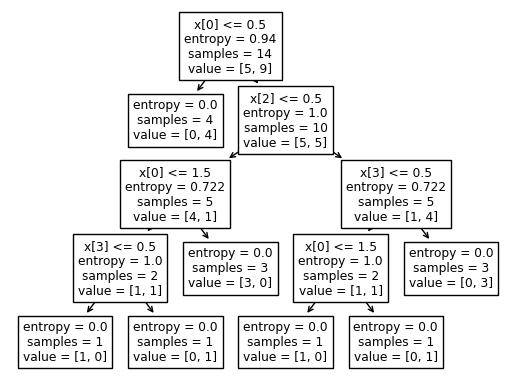

<Figure size 500x600 with 0 Axes>

In [26]:
dtTennisEnc = DecisionTreeClassifier(criterion="entropy")
dtTennisEnc.fit(XTennisEnc, YTennisEnc)
sklearn.tree.plot_tree(dtTennisEnc); plt.figure(figsize=(5, 6)); plt.show()

##### Play Tennis Numérico

- **Agoritmo**

In [27]:
ArvoreTennisNum = ArvoreDecisao()
ArvoreTennisNum.fit(xtennisNum, ytennisNum)
print(ArvoreTennisNum)

'Atributo = 2 // Ramos = [55] <= Valor de corte // Exemplos no Nó = 14'
	"Atributo = 2 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 5"
	'Atributo = 2 // Ramos = [65] <= Valor de corte // Exemplos no Nó = 9'
		"Atributo = 2 // Ramos = ['No'] Folha; // Exemplos no Nó = 4"
		'Atributo = 1 // Ramos = [13.5] <= Valor de corte // Exemplos no Nó = 5'
			"Atributo = 1 // Ramos = ['No'] Folha; // Exemplos no Nó = 1"
			"Atributo = 1 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 4"



- **Função sklearn** (O modelo de `DecisionTreeClassifier` do `sklearn` não aceita atributos mistos, dessa forma essa execução não será feita)

##### Iris

- **Agoritmo**

In [28]:
ArvoreIris = ArvoreDecisao()
ArvoreIris.fit(X_trainIris, y_trainIris)
print(ArvoreIris)

'Atributo = 3 // Ramos = [1.] <= Valor de corte // Exemplos no Nó = 112'
	"Atributo = 3 // Ramos = ['setosa'] Folha; // Exemplos no Nó = 37"
	'Atributo = 3 // Ramos = [1.7] <= Valor de corte // Exemplos no Nó = 75'
		'Atributo = 2 // Ramos = [5.] <= Valor de corte // Exemplos no Nó = 37'
			"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 32"
			'Atributo = 3 // Ramos = [1.6] <= Valor de corte // Exemplos no Nó = 5'
				"Atributo = 3 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 3"
				'Atributo = 2 // Ramos = [5.8] <= Valor de corte // Exemplos no Nó = 2'
					"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 1"
					"Atributo = 2 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 1"
		'Atributo = 2 // Ramos = [4.9] <= Valor de corte // Exemplos no Nó = 38'
			'Atributo = 1 // Ramos = [3.2] <= Valor de corte // Exemplos no Nó = 4'
				"Atributo = 1 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 3"
				"Atributo = 1 // Ramos = ['versicolor

- **Função sklearn**

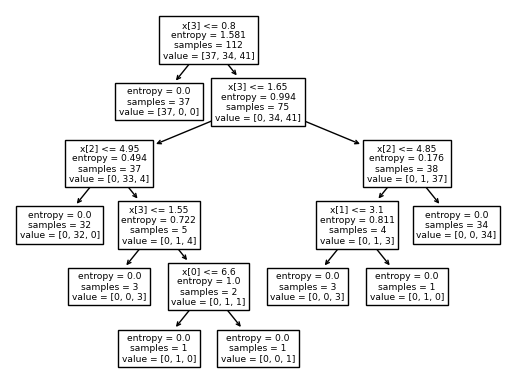

<Figure size 500x600 with 0 Axes>

In [29]:
dtIris = DecisionTreeClassifier(criterion="entropy")
dtIris.fit(X_trainIris, y_trainIris)
sklearn.tree.plot_tree(dtIris); plt.figure(figsize=(5, 6)); plt.show()

##### Wine

- **Agoritmo**

In [30]:
ArvoreWine = ArvoreDecisao()
ArvoreWine.fit(X_trainWine, y_trainWine)
print(ArvoreWine)

'Atributo = 9 // Ramos = [-0.60725343] <= Valor de corte // Exemplos no Nó = 124'
	"Atributo = 9 // Ramos = ['class_1'] Folha; // Exemplos no Nó = 43"
	'Atributo = 6 // Ramos = [-0.53632625] <= Valor de corte // Exemplos no Nó = 81'
		"Atributo = 6 // Ramos = ['class_2'] Folha; // Exemplos no Nó = 28"
		'Atributo = 12 // Ramos = [0.00164224] <= Valor de corte // Exemplos no Nó = 53'
			'Atributo = 1 // Ramos = [1.4440327] <= Valor de corte // Exemplos no Nó = 11'
				"Atributo = 1 // Ramos = ['class_1'] Folha; // Exemplos no Nó = 10"
				"Atributo = 1 // Ramos = ['class_0'] Folha; // Exemplos no Nó = 1"
			"Atributo = 12 // Ramos = ['class_0'] Folha; // Exemplos no Nó = 42"



- **Função sklearn**

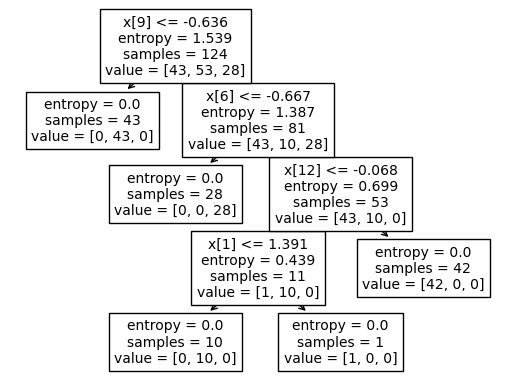

<Figure size 500x600 with 0 Axes>

In [31]:
dtWine = DecisionTreeClassifier(criterion="entropy")
dtWine.fit(X_trainWine, y_trainWine)
sklearn.tree.plot_tree(dtWine); plt.figure(figsize=(5, 6)); plt.show()

##### Breast Cancer

- **Agoritmo**

In [32]:
ArvoreCancer = ArvoreDecisao()
ArvoreCancer.fit(X_trainCancer, y_trainCancer)
print(ArvoreCancer)

'Atributo = 7 // Ramos = [0.09311633] <= Valor de corte // Exemplos no Nó = 455'
	'Atributo = 20 // Ramos = [0.13626713] <= Valor de corte // Exemplos no Nó = 282'
		'Atributo = 13 // Ramos = [0.19156129] <= Valor de corte // Exemplos no Nó = 263'
			'Atributo = 21 // Ramos = [0.77813892] <= Valor de corte // Exemplos no Nó = 260'
				"Atributo = 21 // Ramos = ['benign'] Folha; // Exemplos no Nó = 225"
				'Atributo = 23 // Ramos = [-0.39394683] <= Valor de corte // Exemplos no Nó = 35'
					"Atributo = 23 // Ramos = ['benign'] Folha; // Exemplos no Nó = 25"
					'Atributo = 2 // Ramos = [-0.22812006] <= Valor de corte // Exemplos no Nó = 10'
						'Atributo = 29 // Ramos = [-0.69596444] <= Valor de corte // Exemplos no Nó = 4'
							"Atributo = 29 // Ramos = ['benign'] Folha; // Exemplos no Nó = 1"
							"Atributo = 29 // Ramos = ['malignant'] Folha; // Exemplos no Nó = 3"
						"Atributo = 2 // Ramos = ['benign'] Folha; // Exemplos no Nó = 6"
			'Atributo = 28 // Ramos = [-1.150921

- **Função sklearn**

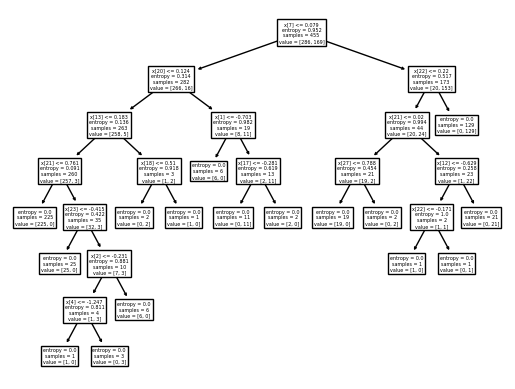

<Figure size 500x600 with 0 Axes>

In [33]:
dtCancer = DecisionTreeClassifier(criterion="entropy")
dtCancer.fit(X_trainCancer, y_trainCancer)
sklearn.tree.plot_tree(dtCancer); plt.figure(figsize=(5, 6)); plt.show()

#### Avaliação dos Modelos e Podagem

Abaixo serão executados os testes do modelo para cada base de dados comparando os resultados com a predição do modelo podado e com a predição do modelo importado do `sklearn` quando realizado o treinamento no mesmo. A avaliação dos modelos é feita pela função `avaliacao` que retorna a matriz de confusão da predição, algumas métricas de revocação, precisão e f1-score bem como a acurácia da predição.  A poda será feita com o método `poda` com os parâmetros de _porcentagemCorte_=0.33 e ciclos=3.

##### Play Tennis

In [34]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreTennis.predict(xtennis), ytennis)

############## Agoritmo Proposto ##############

[[5 0]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Acurácia: 100.0 %


Como podemos ver abaixo, nenhum nó se encaixa nos requisitos de poda, dessa forma nenhum nó é podado para esta árvore.

In [35]:
ArvoreTennis.poda(0.33,3)

Ciclo 1
Nenhum nó podado neste ciclo


##### Play Tennis Codificado

In [36]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreTennisEnc.predict(XTennisEnc), YTennisEnc)

print("\n############## Modelo Sklearn ##############\n")
avaliacao(dtTennisEnc.predict(XTennisEnc), YTennisEnc)


############## Agoritmo Proposto ##############

[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Acurácia: 100.0 %

############## Modelo Sklearn ##############

[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Acurácia: 100.0 %


Como podemos ver abaixo, nenhum nó se encaixa nos requisitos de poda, dessa forma nenhum nó é podado para esta árvore.

In [37]:
ArvoreTennisEnc.poda(0.33, 3)

Ciclo 1
Nenhum nó podado neste ciclo


##### Play Tennis Numérico

In [38]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreTennisNum.predict(xtennisNum), ytennisNum)

############## Agoritmo Proposto ##############

[[5 0]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Acurácia: 100.0 %


Árvore original antes da poda

In [39]:
print(ArvoreTennisNum)

'Atributo = 2 // Ramos = [55] <= Valor de corte // Exemplos no Nó = 14'
	"Atributo = 2 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 5"
	'Atributo = 2 // Ramos = [65] <= Valor de corte // Exemplos no Nó = 9'
		"Atributo = 2 // Ramos = ['No'] Folha; // Exemplos no Nó = 4"
		'Atributo = 1 // Ramos = [13.5] <= Valor de corte // Exemplos no Nó = 5'
			"Atributo = 1 // Ramos = ['No'] Folha; // Exemplos no Nó = 1"
			"Atributo = 1 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 4"



Árvore resultante da poda e sua avaliação de desempenho.

In [40]:
ArvoreTennisNum.poda(0.33, 3)

Ciclo 1
Nó podado:  Atributo = 1 // Ramos = [13.5] <= Valor de corte // Exemplos no Nó = 5
Ciclo 2
Nenhum nó podado neste ciclo


In [41]:
print(ArvoreTennisNum)

'Atributo = 2 // Ramos = [55] <= Valor de corte // Exemplos no Nó = 14'
	"Atributo = 2 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 5"
	'Atributo = 2 // Ramos = [65] <= Valor de corte // Exemplos no Nó = 9'
		"Atributo = 2 // Ramos = ['No'] Folha; // Exemplos no Nó = 4"
		"Atributo = 1 // Ramos = ['Yes'] Folha; // Exemplos no Nó = 5"



In [42]:
print("############## Agoritmo Podado ##############\n")
avaliacao(ArvoreTennisNum.predict(xtennisNum), ytennisNum)

############## Agoritmo Podado ##############

[[4 1]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      0.80      0.89         5
         Yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

Acurácia: 92.85714285714286 %


##### Iris

In [43]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreIris.predict(X_testIris), y_testIris)

print("\n############## Modelo Sklearn ##############\n")
avaliacao(dtIris.predict(X_testIris), y_testIris)

############## Agoritmo Proposto ##############

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %

############## Modelo Sklearn ##############

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %


Árvore original antes da poda

In [44]:
print(ArvoreIris)

'Atributo = 3 // Ramos = [1.] <= Valor de corte // Exemplos no Nó = 112'
	"Atributo = 3 // Ramos = ['setosa'] Folha; // Exemplos no Nó = 37"
	'Atributo = 3 // Ramos = [1.7] <= Valor de corte // Exemplos no Nó = 75'
		'Atributo = 2 // Ramos = [5.] <= Valor de corte // Exemplos no Nó = 37'
			"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 32"
			'Atributo = 3 // Ramos = [1.6] <= Valor de corte // Exemplos no Nó = 5'
				"Atributo = 3 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 3"
				'Atributo = 2 // Ramos = [5.8] <= Valor de corte // Exemplos no Nó = 2'
					"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 1"
					"Atributo = 2 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 1"
		'Atributo = 2 // Ramos = [4.9] <= Valor de corte // Exemplos no Nó = 38'
			'Atributo = 1 // Ramos = [3.2] <= Valor de corte // Exemplos no Nó = 4'
				"Atributo = 1 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 3"
				"Atributo = 1 // Ramos = ['versicolor

Árvore resultante da poda e sua avaliação de desempenho.

In [45]:
ArvoreIris.poda(0.33, 3)

Ciclo 1
Nó podado:  Atributo = 1 // Ramos = [3.2] <= Valor de corte // Exemplos no Nó = 4
Ciclo 2
Nó podado:  Atributo = 2 // Ramos = [4.9] <= Valor de corte // Exemplos no Nó = 38
Ciclo 3
Nenhum nó podado neste ciclo


In [46]:
print(ArvoreIris)

'Atributo = 3 // Ramos = [1.] <= Valor de corte // Exemplos no Nó = 112'
	"Atributo = 3 // Ramos = ['setosa'] Folha; // Exemplos no Nó = 37"
	'Atributo = 3 // Ramos = [1.7] <= Valor de corte // Exemplos no Nó = 75'
		'Atributo = 2 // Ramos = [5.] <= Valor de corte // Exemplos no Nó = 37'
			"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 32"
			'Atributo = 3 // Ramos = [1.6] <= Valor de corte // Exemplos no Nó = 5'
				"Atributo = 3 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 3"
				'Atributo = 2 // Ramos = [5.8] <= Valor de corte // Exemplos no Nó = 2'
					"Atributo = 2 // Ramos = ['versicolor'] Folha; // Exemplos no Nó = 1"
					"Atributo = 2 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 1"
		"Atributo = 2 // Ramos = ['virginica'] Folha; // Exemplos no Nó = 38"



In [47]:
print("############## Agoritmo Podado ##############\n")
avaliacao(ArvoreIris.predict(X_testIris), y_testIris)

############## Agoritmo Podado ##############

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %


##### Wine

In [48]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreWine.predict(X_testWine), y_testWine)

print("\n ############## Modelo Sklearn ##############\n")
avaliacao(dtWine.predict(X_testWine), y_testWine)

############## Agoritmo Proposto ##############

[[15  1  0]
 [ 0 16  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.89      0.89      0.89        18
     class_2       0.90      0.95      0.93        20

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

Acurácia: 92.5925925925926 %

 ############## Modelo Sklearn ##############

[[15  1  0]
 [ 0 16  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.89      0.89      0.89        18
     class_2       0.90      0.95      0.93        20

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

Acurácia: 92.5925925925926 %


Árvore original antes da poda

In [49]:
print(ArvoreWine)

'Atributo = 9 // Ramos = [-0.60725343] <= Valor de corte // Exemplos no Nó = 124'
	"Atributo = 9 // Ramos = ['class_1'] Folha; // Exemplos no Nó = 43"
	'Atributo = 6 // Ramos = [-0.53632625] <= Valor de corte // Exemplos no Nó = 81'
		"Atributo = 6 // Ramos = ['class_2'] Folha; // Exemplos no Nó = 28"
		'Atributo = 12 // Ramos = [0.00164224] <= Valor de corte // Exemplos no Nó = 53'
			'Atributo = 1 // Ramos = [1.4440327] <= Valor de corte // Exemplos no Nó = 11'
				"Atributo = 1 // Ramos = ['class_1'] Folha; // Exemplos no Nó = 10"
				"Atributo = 1 // Ramos = ['class_0'] Folha; // Exemplos no Nó = 1"
			"Atributo = 12 // Ramos = ['class_0'] Folha; // Exemplos no Nó = 42"



Árvore resultante da poda e sua avaliação de desempenho.

In [50]:
ArvoreWine.poda(0.33, 3)

Ciclo 1
Nó podado:  Atributo = 1 // Ramos = [1.4440327] <= Valor de corte // Exemplos no Nó = 11
Ciclo 2
Nó podado:  Atributo = 12 // Ramos = [0.00164224] <= Valor de corte // Exemplos no Nó = 53
Ciclo 3
Nenhum nó podado neste ciclo


In [51]:
print(ArvoreWine)

'Atributo = 9 // Ramos = [-0.60725343] <= Valor de corte // Exemplos no Nó = 124'
	"Atributo = 9 // Ramos = ['class_1'] Folha; // Exemplos no Nó = 43"
	'Atributo = 6 // Ramos = [-0.53632625] <= Valor de corte // Exemplos no Nó = 81'
		"Atributo = 6 // Ramos = ['class_2'] Folha; // Exemplos no Nó = 28"
		"Atributo = 12 // Ramos = ['class_0'] Folha; // Exemplos no Nó = 53"



In [52]:
print("############## Agoritmo Podado ##############\n")
avaliacao(ArvoreWine.predict(X_testWine), y_testWine)

############## Agoritmo Podado ##############

[[16  0  0]
 [ 4 12  2]
 [ 1  0 19]]
              precision    recall  f1-score   support

     class_0       0.76      1.00      0.86        16
     class_1       1.00      0.67      0.80        18
     class_2       0.90      0.95      0.93        20

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.86        54
weighted avg       0.89      0.87      0.87        54

Acurácia: 87.03703703703704 %


##### Breast Cancer

In [53]:
print("############## Agoritmo Proposto ##############\n")
avaliacao(ArvoreCancer.predict(X_testCancer), y_testCancer)

print("\n############## Modelo Sklearn ##############n")
avaliacao(dtCancer.predict(X_testCancer), y_testCancer)

############## Agoritmo Proposto ##############

[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        71
   malignant       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Acurácia: 96.49122807017544 %

############## Modelo Sklearn ##############n
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        71
   malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Acurácia: 95.6140350877193 %


Árvore original antes da poda

In [54]:
print(ArvoreCancer)

'Atributo = 7 // Ramos = [0.09311633] <= Valor de corte // Exemplos no Nó = 455'
	'Atributo = 20 // Ramos = [0.13626713] <= Valor de corte // Exemplos no Nó = 282'
		'Atributo = 13 // Ramos = [0.19156129] <= Valor de corte // Exemplos no Nó = 263'
			'Atributo = 21 // Ramos = [0.77813892] <= Valor de corte // Exemplos no Nó = 260'
				"Atributo = 21 // Ramos = ['benign'] Folha; // Exemplos no Nó = 225"
				'Atributo = 23 // Ramos = [-0.39394683] <= Valor de corte // Exemplos no Nó = 35'
					"Atributo = 23 // Ramos = ['benign'] Folha; // Exemplos no Nó = 25"
					'Atributo = 2 // Ramos = [-0.22812006] <= Valor de corte // Exemplos no Nó = 10'
						'Atributo = 29 // Ramos = [-0.69596444] <= Valor de corte // Exemplos no Nó = 4'
							"Atributo = 29 // Ramos = ['benign'] Folha; // Exemplos no Nó = 1"
							"Atributo = 29 // Ramos = ['malignant'] Folha; // Exemplos no Nó = 3"
						"Atributo = 2 // Ramos = ['benign'] Folha; // Exemplos no Nó = 6"
			'Atributo = 28 // Ramos = [-1.150921

Árvore resultante da poda e sua avaliação de desempenho.

In [55]:
ArvoreCancer.poda(0.33, 3)

Ciclo 1
Nó podado:  Atributo = 29 // Ramos = [-0.69596444] <= Valor de corte // Exemplos no Nó = 4
Nó podado:  Atributo = 17 // Ramos = [-0.24875045] <= Valor de corte // Exemplos no Nó = 13
Nó podado:  Atributo = 27 // Ramos = [0.9182202] <= Valor de corte // Exemplos no Nó = 21
Ciclo 2
Nó podado:  Atributo = 21 // Ramos = [-0.87410169] <= Valor de corte // Exemplos no Nó = 19
Ciclo 3
Nenhum nó podado neste ciclo


In [56]:
print(ArvoreCancer)

'Atributo = 7 // Ramos = [0.09311633] <= Valor de corte // Exemplos no Nó = 455'
	'Atributo = 20 // Ramos = [0.13626713] <= Valor de corte // Exemplos no Nó = 282'
		'Atributo = 13 // Ramos = [0.19156129] <= Valor de corte // Exemplos no Nó = 263'
			'Atributo = 21 // Ramos = [0.77813892] <= Valor de corte // Exemplos no Nó = 260'
				"Atributo = 21 // Ramos = ['benign'] Folha; // Exemplos no Nó = 225"
				'Atributo = 23 // Ramos = [-0.39394683] <= Valor de corte // Exemplos no Nó = 35'
					"Atributo = 23 // Ramos = ['benign'] Folha; // Exemplos no Nó = 25"
					'Atributo = 2 // Ramos = [-0.22812006] <= Valor de corte // Exemplos no Nó = 10'
						"Atributo = 29 // Ramos = ['malignant'] Folha; // Exemplos no Nó = 4"
						"Atributo = 2 // Ramos = ['benign'] Folha; // Exemplos no Nó = 6"
			'Atributo = 28 // Ramos = [-1.15092154] <= Valor de corte // Exemplos no Nó = 3'
				"Atributo = 28 // Ramos = ['malignant'] Folha; // Exemplos no Nó = 2"
				"Atributo = 28 // Ramos = ['benign'] Fo

In [57]:
print("############## Agoritmo Podado ##############\n")
avaliacao(ArvoreCancer.predict(X_testCancer), y_testCancer)

############## Agoritmo Podado ##############

[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        71
   malignant       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Acurácia: 96.49122807017544 %


#### Outra implementação da Árvore Utilizando Numpy e Array List do Python

Abaixo temos a implementação da Árvore de Decisão utilizando tanto Numpy Arrays e seus métodos quanto Array List do próprio Python. Essa variação apresentou uma acurácia igual, contudo um desempenho muito melhor em relação ao tempo de treinamento. Podemos comparar os tempos no treinamento utilizando a base de Cancer de Mama pela sua grande quantidade de exemplos e atributos. Mesmo o simples emprego do NumPy na função de entropia já ocasionava uma demora maior no treinamento e conforme as demais funções auxiliares foram utilizando apenas os métodos NumPy, mais devagar o modelo treinava.

##### Código da Árvore e suas funções auxiliares sem o uso extensivo do NumPy (SNP)

In [58]:
def entropiaSNP(probs: list) -> float:
    """
    Função que recebe um vetor de probabilidades e retorna o cálculo da entropia de Shannon baseado na seguinte fórmula sem utilizar funções do Numpy:
    H(x) = -p1*log(p1)-p2*log(p2)-...-pn*log(pn).
    :param probs: recebe um array de probabilidades (valores entre 0 e 1)
    :return: float Entropia
    """
    h = 0
    for p in probs:
        if(p!=0):
            h = h-p*math.log2(p)
    return h

def infoTabelaSNP(classes: list)-> float:
    """
    Função que recebe um vetor de classes (rótulos) e retorna a entropia do determinado vetor evitando o uso completo das funções do Numpy.
    :param classes: recebe um array de classes (rótulos) 
    :return float Entropia contida no vetor de classes
    """
    probs = []
    _, freq = np.unique(classes, return_counts=True)
    for f in freq:
        probs.append(f/len(classes))
    return entropiaSNP(probs)

def ganho_info_categoriaSNP(idx: int, tabela: np.ndarray, classes: np.ndarray) -> float:
    """
    Função que recebe um índice referente a um atributo específico, um array com todos os exemplos da amostra 
    selecionada e o array contendo as classes desses exemplos e retorna o ganho de informação obtido por esse 
    determinado atributo. Essa implementação utiliza loops e listas em vários momentos, sem o auxilio do numpy
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :return float retorna o ganho de informação do atributo desejado
    """ 
    infos = []
    probs = []
    _, freq = np.unique(classes, return_counts=True)
    tabelaT = tabela.T
    for f in freq:
        probs.append(f/len(classes))
    infoOriginal = infoTabelaSNP(classes)
    freq = []
    for val in np.unique(tabelaT[idx]):
        idxClasses = np.nonzero(tabelaT[idx]==val)[0]
        _, freqRot = np.unique(classes[idxClasses], return_counts=True)
        prob = []
        n = len(idxClasses)
        for f in freqRot:
            prob.append(f/n)
        infos.append(entropiaSNP(prob))
        freq.append(n)
    infoNova = 0
    for i in range(len(infos)):
        infoNova = infoNova + freq[i]*infos[i]
    infoNova = infoNova/np.sum(freq)
    ganho = infoOriginal - infoNova
    return ganho

def ganhoCorteSNP(tabela: np.ndarray, classes: np.ndarray, infoOriginal: float, idx: int, corte: float) -> float:
    """
    Função que recebe um array com todos os exemplos da amostra selecionada, o array contendo as classes 
    desses exemplos, um valor de informação, um índice do atributo desejado, um valor de corte e retorna 
    o ganho de informação obtido por esse determinado atributo com base no valor de corte especificado.
    O uso das funções do Numpy é mais restrita nessa implementação
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :param infoOriginal: recebe um float que representa a entropia de todos os exemplos
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param corte: recebe um float que representa o valor de corte desejado
    :return float retorna o ganho de informação do atributo desejado
    """
    freq = []
    infos = []
    for s in [0,1]:
        if(s == 0):
            idxClasses = np.nonzero(tabela[idx]<corte)[0]
        else:
            idxClasses = np.nonzero(tabela[idx]>=corte)[0]
        _, freqRot = np.unique(classes[idxClasses], return_counts=True)
        prob = []
        n = len(idxClasses)
        for f in freqRot:
            prob.append(f/n)
        infos.append(entropiaSNP(prob))
        freq.append(n)
    infoNova = 0
    for l in range(len(infos)):
        infoNova = infoNova + freq[l]*infos[l]
    infoNova = infoNova/np.sum(freq)
    ganho = infoOriginal - infoNova
    return ganho

def ganho_info_numericoSNP(idx: int, tabela: np.ndarray, classes: np.ndarray) -> tuple: 
    """
    Função que recebe um índice de determinado atributo, um array com todos os exemplos da amostra selecionada, 
    um array contendo as classes desses exemplos e retorna o maior ganho de informação obtido por esse determinado 
    atributo e valor corte que gera essa este ganho de informação. Essa implementação chama as funções SNP (Sem NumPy)
    :param idx: recebe um inteiro que representa o índice do atributo desejado
    :param tabela: recebe um array com os exemplos da amostra
    :param classes: recebe um array de classes dos exemplos
    :return retorna o ganho de informação do atributo desejado e o valor de corte encontrado
    """
    ganhoFinal = 0
    corteFinal = 0
    tabelaT = tabela.T
    atributos = np.unique(tabelaT[idx])
    infoOriginal = infoTabelaSNP(classes)
    n = len(atributos)
    if(n==2):
        corteFinal = atributos[1]
        ganhoFinal = ganhoCorteSNP(tabelaT, classes, infoOriginal, idx, corteFinal)
    elif(n>2):
        for i in range(len(atributos)):
            corte = atributos[i]
            ganho = ganhoCorteSNP(tabelaT, classes, infoOriginal, idx, corte)
            if(ganhoFinal <= ganho):
                ganhoFinal = ganho
                corteFinal = corte
    return ganhoFinal, corteFinal

class ArvoreDecisaoSNP:
    def __init__(self, valor=-1,  nramos = 1, valRamos = list(), subnos = list(), corte=False):
        """
        Método que recebe um índice do atributo que o nó representa, o número de ramos que ele possui, um array contendo os 
        valores do atributo do nó associados a cada subnó, um array contendo os subnós e um indicador se o atributo relacionado 
        ao nó é numérico ou categórico (possui valor de corte ou não).
        :param valor: recebe um inteiro que representa o índice do atributo relacionado ao nó
        :param nramos:  recebe um inteiro que indica a quantidade de ramos do nó
        :param valRamos: recebe um array com os valores associados aos ramos do nó
        :param subnos: recebe um array nós do tipo Árvore de Decisão associados aos ramos
        :param corte: recebe um booleano que indica se valor do ramo é um valor de corte e consequentemente se o atributo 
        do nó é numérico
        """
        self.valor = valor
        self.nramos = nramos
        self.valRamos = valRamos
        self.subnos = subnos
        self.corte = corte
    
    def folha(self):
        """
        Método que indica se o nó da árvore é folha ou não.
        :return retorna um booleano indicando se o nó é folha
        """
        return len(self.subnos) == 0

    
    def __str__(self, level=0) -> str: 
        """
        Método que transforma o nó atual em string e os seus ramos recursivamente de maneira estruturada.
        :param level recebe um inteiro que indica o nível do nó atual em relação à raíz da árvore.
        :return retorna a string estruturada do nó e de seus ramos
        """
        no = "Atributo = {} // Ramos = {}".format(self.valor, self.valRamos) + str(" <= Valor de corte" if self.corte else "") + str(" Folha;" if self.folha() else "")
        ret = "\t"*level+repr(no)+"\n"
        for subno in self.subnos:
            ret += subno.__str__(level+1)
        return ret

    def __repr__(self):
        """
        Método que retorna a string que contém o índice do atributo associado ao nó, os valores dos ramos,
        as indicações se o nó pussi valor de corte ou se é folha.
        :return retorna a string do nó atual
        """
        no = "Atributo = {} // Ramos = {}".format(self.valor, self.valRamos) + str(" <= Valor de corte" if self.corte else "") + str(" Folha;" if self.folha() else "")
        return no
    

    def fit(self, X: np.ndarray, Y: np.ndarray, atributo=-1, tipoColuna=list()):
        """
        Método que realiza o treinamento da Árvore de Decisão a partir do array contendo os exemplos de 
        treinamento, um array contendo as classes dos exemplos, o atributo associado ao nó pai, um array 
        contendo o tipo de cada atributo dos exemplos e retorna o nó raiz da árvore.
        :param X recebe um array contendo os exemplos de treinameto
        :param Y: recebe um array contendo as classes dos exemplos de treinamento
        :param atributo: recebe um inteiro indicando o índice do atributo relacionado ao nó pai
        :param tipoColuna: recebe um array contendo o tipo de cada atributo dos exemplos de treinamento
        """
        self.valor=-1
        self.valRamos=[]
        self.subnos = []
        self.corte=False
        if( len(np.unique(Y))==1):
            self.valor=atributo
            self.valRamos=[Y[0]]
        else:
            Xbest = 0
            valorCorteBest = ""
            Xtransposto = X.T
            for col in range(X.shape[1]):
                if(type(Xtransposto[Xbest][0])!=str if atributo == -1 else tipoColuna[Xbest] == "N"):
                    num = ganho_info_numericoSNP(Xbest, X, Y)
                    ganhoBest = num[0]
                    valorCorteBest = num[1]
                else:
                    ganhoBest = ganho_info_categoriaSNP(Xbest, X, Y)
                    valorCorteBest = ""
                if(type(Xtransposto[col][0])!=str if atributo == -1 else tipoColuna[Xbest] == "N"):
                    if(atributo==-1):
                        tipoColuna = np.append(tipoColuna,"N")
                    num = ganho_info_numericoSNP(col, X, Y)
                    ganhoCol = num[0]
                    valorCorte = num[1]
                else:
                    if(atributo==-1):
                        tipoColuna = np.append(tipoColuna,"C")
                    ganhoCol = ganho_info_categoriaSNP(col, X, Y)
                    valorCorte=""
                if(ganhoCol>= ganhoBest):
                    Xbest =  col
                    valorCorteBest = valorCorte
            if(valorCorteBest!=""):
                valRamos = [valorCorteBest]
                self.valor=Xbest; self.nramos=len(valRamos); self.valRamos=valRamos; self.corte=True
                idxVal = np.nonzero(Xtransposto[Xbest]<valorCorteBest)[0]
                self.subnos = np.append(self.subnos, ArvoreDecisaoSNP())
                self.subnos[0].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)
                idxVal = np.nonzero(Xtransposto[Xbest]>=valorCorteBest)[0]
                self.subnos = np.append(self.subnos, ArvoreDecisaoSNP())
                self.subnos[1].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)
            else:
                valRamos = np.unique(Xtransposto[Xbest])
                self.valor=Xbest; self.nramos=len(valRamos); self.valRamos=valRamos
                for i, val in enumerate(valRamos):
                    idxVal = np.nonzero(Xtransposto[Xbest]==val)[0]
                    self.subnos = np.append(self.subnos, ArvoreDecisaoSNP())
                    self.subnos[i].fit(X[idxVal], Y[idxVal], Xbest, tipoColuna=tipoColuna)

    def predictOne(self, X:np.ndarray):
        """
        Método que realiza a predição de um exemplo ao percorrer a árvore e retornando a classe do nó folha encontrado
        :param X recebe um array contendo os atributos do exemplo de treinamento
        :return retorna a classe predita do exemplo passado
        """
        if(self.folha()):
            return self.valRamos[0]
        elif(self.corte):
             if(X[self.valor]<self.valRamos[0]):
                return self.subnos[0].predictOne(X)
             else:
                 return self.subnos[1].predictOne(X)
        else:
            for i in range(self.nramos):
                if(X[self.valor]==self.valRamos[i]):
                    return self.subnos[i].predictOne(X)
            
    def predict(self, X:np.ndarray):
        """
        Método que realiza a predição de vários exemplos
        :param X recebe um array contendo os exemplos de treinamento
        :return retorna um array com as classes preditas dos exemplos passado
        """
        ypred = []
        for x in X:
            ypred.append(self.predictOne(x))
        return ypred

##### Comparação do tempo

In [59]:
ArvoreSNP = ArvoreDecisaoSNP()
inicioSNP = time.time()
ArvoreSNP.fit(X_trainCancer, y_trainCancer)
TtrainSNP =  time.time()-inicioSNP

In [60]:
ArvoreCNP = ArvoreDecisao()
inicioCNP =  time.time()
ArvoreCNP.fit(X_trainCancer, y_trainCancer)
TtrainCNP =  time.time()-inicioCNP

In [61]:
dt = DecisionTreeClassifier(criterion="entropy")
inicioSKL =  time.time()
dt.fit(X_trainCancer, y_trainCancer)
TtrainSKL =  time.time()-inicioSKL

In [62]:
print("Tempo de execução do Algoritmo 100% NumPy: {:.4f} segundos".format(TtrainCNP))
print("Tempo de execução do Algoritmo Misto entre NumPy e Array List: {:.4f} segundos".format(TtrainSNP))
print("Tempo de execução do modelo do Sklearn: {:.4f} segundos".format(TtrainSKL))

Tempo de execução do Algoritmo 100% NumPy: 16.3639 segundos
Tempo de execução do Algoritmo Misto entre NumPy e Array List: 12.3714 segundos
Tempo de execução do modelo do Sklearn: 0.0090 segundos


#### Discussão Árvore de Decisão

<div style="text-align: justify">
Ao desenvolver a seção de "Avaliação dos Modelos", inicialmente apenas uma predição de base de dados obteve acurácia menor que a obtida pelo modelo importado da biblioteca `sklearn`, a predição realizada na base Iris. Os primeiros resultados eram de 94% de acurácia para o algoritmo implementado e 97% para o modelo importado, isso ocorria por conta da montagem da árvore durante a escolha do primeiro atributo com maior ganho de informação. 2 atributos possuiam o mesmo ganho e nesse caso o algoritmo desenvolvido selecionava o primeiro enquanto que o modelo de referência selecionava o segundo atributo. Dessa forma, a escolha de atributos com o mesmo ganho foi alterada nas funções de fit apra a escolha do último atributo que apresentou o maior valor de ganho. Essa mudaça garantiu a confecção da mesma árvore entres os modelos após o treinamento na base Iris, o que consequentemente igualou as acurácias entres os dois modelos em 97%. Contudo, houve uma mudança no treinamento com a base de Câncer de Mama (Breast Cancer), na qual a acurácia saltou de 95,61% para 96,49%. superando a acurácia de teste do modelo de referência que varia entre 94% e 95%.
<div>

O algoritmo de poda das árvores desenvolvido foi o mais simples possível afim de não adicionar mais complexidade ao modelo e funciona bem. O impacto final na acurácia do modelo acabou sendo mínima na maioria dos casos. Contudo, po conta de sua simplicidade, para se obter uma poda maior é preciso usar porcentagens de corte muito altas e muitos ciclos, o que pode prejudicar bastante o desempenho final do modelo.

<div style="text-align: justify">
Os resultados obtidos foram muito além do esperado para a Árvore Decisão, já que as métricas de avaliação foram semelhantes e até melhores em certos casos em relação ao modelo de referência. Dito isso, é comprovada a eficácia do método de seleção de atributos a partir do cálculo da Entropia de Shannon e do ganho de informação. Além disso, é possível notar o impacto que diferentes estratégias de implementação podem causar no desempenho do modelo, tanto na sua acurácia como no tempo de treinamento. Portanto é de fundamental importância o desenvolvedor estar alinhado com as técnicas de aprendizado de máquina afim de saber tratar exceções e otimizar seus modelos.
<div>

### k-NN (k Nearest Neighbours)

<div style=" text-align: justify;">
O k-NN é um algoritmo de apredizagem de máquina também muito utilizado no apredizado supervisionado. Sua principal característica é a classificação de exemplos a partir da semelhança entre seus atributos. Essa semelhança é calculada utilizando uma função de distância, no caso do trabalho a função de distância implementada é a Distância Euclidiana. O algoritmo consegue classificar conjuntos com atributos numéricos e categóricos codificados e recebe como entrada um DataFrame do Pandas. Além disso, foi implementada a seleção de protótipos tanto pelo método de falsos vizinhos como pela clusterização do k-means.
<div>

#### Definição da classe do k-NN

Abaixo temos a implementação da classe do k-NN. Ao todo ela possui 6 métodos, sendo 1 de treinamento, 1 para predição, 2 para a seleção de protótipos, 1 para o cálculo da distância e o último de inicialização.

- **\_\_init\_\_:** O método de inicialização deve receber 1 parâmetros obrigatório, sendo o número de vizinhos a ser selecionado.

- **dist_euclidiana:** O método que calcula a distância euclidiana entre dois valores.

- **prototypesFV:** O método que realiza a seleção de protótipos utilizando o algoritmo de falsos vizinhos. Para cada exemplo de treino é calculada a distância para os demais exemplos, em seguida é selecionada os k exemplos com menores distâncias. Em seguida é verificada o rótulo de cada um desses exemplos. Se houver algum com rótulo diferente do rótulo do exemplo original, então o vizinho é contabilizado como falso vizinho. Em seguida, se a quantidade de falsos vizinhos for de no máximo 1 esse exemplo é selecionado para ser protótipo, caso contrário ele será ignorado na predição.

- **prototypesKM:** O método que realiza a seleção de protótipos utilizando o algoritmo de k-Means. Primeiramente é definida a quantidade de centroídes a ser calculada, sendo ela a divisão entre a quantidade de exemplos e a quantidade de vizinhos desejada (k). Em seguida é aplicado o `KMeans` do `Sklearn` para o agrupamento e separados os centroídes. Em seguida é calculada a distância de cada exemplo de treino tem de cada centroíde e os exemplos com as menores são selecionados para serem os protótipos.

- **fit:** O método que realiza o treinamento do k-NN. Seus parâmetros são os exemplos de treino, suas respectivas classes, um booleano para a indicação do uso dos protótipos e o método de cálculo dos protótipos ("KM" para KMeans e "FV" para Falsos Vizinhos). O algoritmo implementado aceita apenas DataFrames do Pandas como exemplos de treino e Séries do panda como rótulo. **O modelo NÃO aceita Arrays Lists ou Numpy Arrays.**  
A principio o algoritmo apenas armazena os exemplos de treino e seus rótulos. Caso o parâmetro _selectprototypes_ for verdadeiro, então será executada o método de falsos vizinhos _prototypesFV_ por padrão, caso o parâmetro _prototypesMethod_ tenha especificado o tipo de seleção, será aplicada a correspondente (`"FV"` para Falsos Vizinhos e `"KM"` para KMeans).

- **predict:** O método que realiza a predição da classe para vários exemplos. Ele recebe como parâmetro um Dataframe com os exemplos de teste e para cada um deles é calculada a distância entre os exemplos de treino. Assim é selecionado os k vizinhos com menores distâncias para cada exemplo de teste e por voto majoritário selecionado o rótulo do exemplo.

In [63]:
class KNN:
    def __init__(self, k=1):
        """
        Método que recebe o número de vizinhos desejados para o algoritmo.
        :param k: recebe um inteiro que representa o número de vizinhos
        """
        self.k = k
        self.X_treino = None
        self.y_treino = None
    
    def dist_euclidiana(self, arg1: np.ndarray, arg2: np.ndarray):
        """
        Método que recebe dois valores e retorna a distância euclidiana entre eles.
        :param arg1: recebe um vetor de atributos do exemplo
        :param arg2: recebe um vetor de atributos de outro exemplo
        :return retorna um float com a distância entre os dois vetores
        """
        return np.linalg.norm(arg1 - arg2)

    def prototypesFV(self, X_treino: pd.DataFrame, y_treino: pd.Series):
        """
        Método que recebe um DataFrame com os exemplos de treino e uma Série com os rótulos
        dos exemplos e realiza a seleção dos protótipos utilizando o método de Falsos Vizinhos.
        Em seguida, descarta do armazenamento os exemplos com mais de 1 falso vizinho.
        :param X_treino: recebe um Dataframe com os exemplos de treino
        :param y_treino: recebe uma Serie com os rótulos dos exemplos de treino
        """
        id_prototypes = []
        len_xt = range(len(X_treino))
        
        for i in len_xt:
            distancias = []

            for j in len_xt:
                dists = self.dist_euclidiana(X_treino.iloc[i].values, X_treino.iloc[j].values)
                distancias.append(dists)

            i_menores = pd.Series(distancias).nsmallest(self.k).index
            species_proximas = self.y_treino.iloc[i_menores].value_counts()
        
            falsos_visinhos = species_proximas.sum() - species_proximas[y_treino.iloc[i]]
            if falsos_visinhos < 2:
                id_prototypes.append(i)
                
        self.X_treino = X_treino.iloc[id_prototypes]
        self.y_treino = y_treino.iloc[id_prototypes]

    def prototypesKM(self, X_treino: pd.DataFrame, y_treino: pd.Series):
        """
        Método que recebe um DataFrame com os exemplos de treino e uma Série com os rótulos
        dos exemplos e realiza a seleção dos protótipos utilizando o método de KMeans.
        Em seguida, descarta do armazenamento os exemplos com as maiores distâncias entre os
        centróides encontrado pelo KMeans.
        :param X_treino: recebe um Dataframe com os exemplos de treino
        :param y_treino: recebe uma Serie com os rótulos dos exemplos de treino
        """
        n_prototypes = len(X_treino) // self.k 
        kmeans = KMeans(n_clusters=n_prototypes,random_state=0, n_init=10)
        kmeans.fit(X_treino)
    
        centroids = kmeans.cluster_centers_

        id_prototypes = []
        for x in X_treino.values:
            distancias = []

            for centroid in centroids:
                dists = self.dist_euclidiana(x, centroid)
                distancias.append(dists)

            id_prototypes.append(np.argmin(distancias)) 

        select_prototypes = np.unique(id_prototypes)
        
        self.X_treino = X_treino.iloc[select_prototypes]
        self.y_treino = y_treino.iloc[select_prototypes]

    def fit(self, X_treino: pd.DataFrame, y_treino: pd.Series, selectprototypes=False, prototypesMethod='FV'):
        """
        Método que recebe um DataFrame com os exemplos de treino, uma Série com os rótulos
        dos exemplos, um booleando indicando a seleção de protótipos e um string indicando qual método de seleção.
        Os exemplos de treino são armazenados junto com seus rótulos. Caso tenha que selecionar protótipos,
        será aplicado método correspondente ao selecionado no parâmetro prototypesMethod
        :param X_treino: recebe um Dataframe com os exemplos de treino
        :param y_treino: recebe uma Serie com os rótulos dos exemplos de treino
        :param selectprototypes: recebe um booleando com a indição da seleção de protótipos
        :param prototypesMethod: recebe uma string com a indicação do método de seleção de protótipos ('FV' para Falsos Vizinhos e 'KM' para KMeans)
        """
        self.X_treino = X_treino
        self.y_treino = y_treino

        if selectprototypes == True:
            if prototypesMethod == 'FV':
                self.prototypesFV(X_treino, y_treino)
            elif prototypesMethod == 'KM':
                self.prototypesKM(X_treino, y_treino)

    def predict(self, X_teste: pd.DataFrame):
        """
        Método que recebe um DataFrame com os exemplos de teste e percorre por eles calculando para cada um a distância entre ele e
        os exemplos de treinamento salvos. Em seguida seleciona para cada um os k vizinhos com menores distâncias e classifica o exemplo
        pelo voto majoritário entre os rótulos dos k vizinhos.
        :param X_treino: recebe um Dataframe com os exemplos de teste
        :return retorna uma lista de rótulos previstos pelo modelo.
        """
        y_pred = []
        for i in range(len(X_teste)):
            distancias = []

            for j in range(len(self.X_treino)):
                dists = self.dist_euclidiana(X_teste.iloc[i].values, self.X_treino.iloc[j].values)
                distancias.append(dists)

            i_menores = pd.Series(distancias).nsmallest(self.k).index
            especies = self.y_treino.iloc[i_menores]
            mais_proximo = especies.mode().iloc[0]
            y_pred.append(mais_proximo)

        return y_pred
    


#### Treinamento e Avaliação do K-NN

A seguir será feito treinamento e a avaliação de desempenho dos modelos utilizando os conjuntos de dados apresentados anteriormente e verificando o tempo de predição para comparar a seleção de protótipos.

##### Play Tennis K-NN Codificado

In [64]:
knn_tennis = KNN(3)
knn_tennis.fit(XTennisEncPD, YTennisEncPD)
start_time = time.time()
y_pred_tennis = knn_tennis.predict(XTennisEncPD)
total_time_tennis = time.time() - start_time
print("############## Agoritmo K-NN sem seleção protótipos ##############\n")
avaliacao(YTennisEncPD, y_pred_tennis)
print("Tempo total para predição:", total_time_tennis, "segundos")

############## Agoritmo K-NN sem seleção protótipos ##############

[[3 1]
 [2 8]]
              precision    recall  f1-score   support

          No       0.60      0.75      0.67         4
         Yes       0.89      0.80      0.84        10

    accuracy                           0.79        14
   macro avg       0.74      0.78      0.75        14
weighted avg       0.81      0.79      0.79        14

Acurácia: 78.57142857142857 %
Tempo total para predição: 0.022999286651611328 segundos


In [65]:
knn_tennis_FV = KNN(3)
knn_tennis_FV.fit(XTennisEncPD, YTennisEncPD, True, "FV")
start_time = time.time()
y_pred_tennis = knn_tennis_FV.predict(XTennisEncPD)
total_time_tennisFV = time.time() - start_time
print("\n############## Agoritmo K-NN com Falsos Vizinhos ##############\n")
avaliacao(YTennisEncPD, y_pred_tennis)
print("Tempo total para predição:", total_time_tennisFV, "segundos")
print("Redução de", np.round((1-(total_time_tennisFV/total_time_tennis))*100, 2), "% no tempo de predição")



############## Agoritmo K-NN com Falsos Vizinhos ##############

[[3 1]
 [2 8]]
              precision    recall  f1-score   support

          No       0.60      0.75      0.67         4
         Yes       0.89      0.80      0.84        10

    accuracy                           0.79        14
   macro avg       0.74      0.78      0.75        14
weighted avg       0.81      0.79      0.79        14

Acurácia: 78.57142857142857 %
Tempo total para predição: 0.015000104904174805 segundos
Redução de 34.78 % no tempo de predição


In [66]:
knn_tennis_KM = KNN(3)
knn_tennis_KM.fit(XTennisEncPD, YTennisEncPD, True, "KM")
start_time = time.time()
y_pred_tennis = knn_tennis_KM.predict(XTennisEncPD)
total_time_tennisKM = time.time() - start_time
print("\n############## Agoritmo K-NN com KMeans ##############\n")
avaliacao(YTennisEncPD, y_pred_tennis)
print("Tempo total para predição:", total_time_tennisKM, "segundos")
print("Redução de", np.round((1-(total_time_tennisKM/total_time_tennis))*100, 2), "% no tempo de predição")

c:\Users\dan-s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



############## Agoritmo K-NN com KMeans ##############

[[5 4]
 [0 5]]
              precision    recall  f1-score   support

          No       1.00      0.56      0.71         9
         Yes       0.56      1.00      0.71         5

    accuracy                           0.71        14
   macro avg       0.78      0.78      0.71        14
weighted avg       0.84      0.71      0.71        14

Acurácia: 71.42857142857143 %
Tempo total para predição: 0.014999866485595703 segundos
Redução de 34.78 % no tempo de predição


In [67]:
knn_sk = KNeighborsClassifier(n_neighbors=3)

knn_sk.fit(XTennisEncPD, YTennisEncPD)
start_time = time.time()
y_pred_sk_iris = knn_sk.predict(XTennisEncPD)
end_time = time.time()
total_time_skiris = end_time - start_time

print("\n############## Agoritmo Sklearn ##############\n")
avaliacao(YTennisEncPD, y_pred_sk_iris)
print("Tempo total para predição:", total_time_skiris, "segundos")


############## Agoritmo Sklearn ##############

[[3 1]
 [2 8]]
              precision    recall  f1-score   support

          No       0.60      0.75      0.67         4
         Yes       0.89      0.80      0.84        10

    accuracy                           0.79        14
   macro avg       0.74      0.78      0.75        14
weighted avg       0.81      0.79      0.79        14

Acurácia: 78.57142857142857 %
Tempo total para predição: 0.002001047134399414 segundos


##### Conjunto Iris

In [68]:
knn_Iris = KNN(5)
knn_Iris.fit(X_trainIrisPD, y_trainIrisPD)
start_time = time.time()
y_pred_Iris = knn_Iris.predict(X_testIrisPD)
total_time_Iris = time.time() - start_time
print("############## Agoritmo K-NN sem seleção protótipos ##############\n")
avaliacao(y_testIrisPD, y_pred_Iris)
print("Tempo total para predição:", total_time_Iris, "segundos")


############## Agoritmo K-NN sem seleção protótipos ##############

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Acurácia: 100.0 %
Tempo total para predição: 0.2409982681274414 segundos


In [69]:
knn_Iris_FV = KNN(5)
knn_Iris_FV.fit(X_trainIrisPD, y_trainIrisPD, True, "FV")
start_time = time.time()
y_pred_Iris = knn_Iris_FV.predict(X_testIrisPD)
total_time_IrisFV = time.time() - start_time
print("\n############## Agoritmo K-NN com Falsos Vizinhos ##############\n")
avaliacao(y_testIrisPD, y_pred_Iris)
print("Tempo total para predição:", total_time_IrisFV, "segundos")
print("Redução de", np.round((1-(total_time_IrisFV/total_time_Iris))*100, 2), "% no tempo de predição")


############## Agoritmo K-NN com Falsos Vizinhos ##############

[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %
Tempo total para predição: 0.20200014114379883 segundos
Redução de 16.18 % no tempo de predição


In [70]:
knn_Iris_KM = KNN(5)
knn_Iris_KM.fit(X_trainIrisPD, y_trainIrisPD, True, "KM")
start_time = time.time()
y_pred_Iris = knn_Iris_KM.predict(X_testIrisPD)
total_time_IrisKM = time.time() - start_time
print("\n############## Agoritmo K-NN com KMeans ##############\n")
avaliacao(y_testIrisPD, y_pred_Iris)
print("Tempo total para predição:", total_time_IrisKM, "segundos")
print("Redução de", np.round((1-(total_time_IrisKM/total_time_Iris))*100, 2), "% no tempo de predição")

c:\Users\dan-s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



############## Agoritmo K-NN com KMeans ##############

[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %
Tempo total para predição: 0.08000063896179199 segundos
Redução de 66.8 % no tempo de predição


In [71]:
knn_Iris_sk = KNeighborsClassifier(n_neighbors=5)

knn_Iris_sk.fit(X_trainIrisPD, y_trainIrisPD)
start_time = time.time()
y_pred_sk_iris = knn_Iris_sk.predict(X_testIrisPD)
end_time = time.time()
total_time_skiris = end_time - start_time

print("\n############## Agoritmo Sklearn ##############\n")
avaliacao(y_testIrisPD, y_pred_sk_iris)
print("Tempo total para predição:", total_time_skiris, "segundos")


############## Agoritmo Sklearn ##############

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Acurácia: 100.0 %
Tempo total para predição: 0.001998424530029297 segundos


##### Conjunto Wine

In [72]:
knn_Wine = KNN(5)
knn_Wine.fit(X_trainWinePD, y_trainWinePD)
start_time = time.time()
y_pred_Wine = knn_Wine.predict(X_testWinePD)
total_time_Wine = time.time() - start_time
print("############## Agoritmo K-NN sem seleção protótipos ##############\n")
avaliacao(y_testWinePD, y_pred_Wine)
print("Tempo total para predição:", total_time_Wine, "segundos")

############## Agoritmo K-NN sem seleção protótipos ##############

[[16  0  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        16
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Acurácia: 100.0 %
Tempo total para predição: 0.367018461227417 segundos


In [73]:
knn_Wine_FV = KNN(5)
knn_Wine_FV.fit(X_trainWinePD, y_trainWinePD, True, "FV")
start_time = time.time()
y_pred_Wine = knn_Wine_FV.predict(X_testWinePD)
total_time_WineFV = time.time() - start_time
print("\n############## Agoritmo K-NN com Falsos Vizinhos ##############\n")
avaliacao(y_testWinePD, y_pred_Wine)
print("Tempo total para predição:", total_time_WineFV, "segundos")
print("Redução de", np.round((1-(total_time_WineFV/total_time_Wine))*100, 2), "% no tempo de predição")


############## Agoritmo K-NN com Falsos Vizinhos ##############

[[16  0  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        16
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Acurácia: 100.0 %
Tempo total para predição: 0.31500983238220215 segundos
Redução de 14.17 % no tempo de predição


In [74]:
knn_Wine_KM = KNN(5)
knn_Wine_KM.fit(X_trainWinePD, y_trainWinePD, True, "KM")
start_time = time.time()
y_pred_Wine = knn_Wine_KM.predict(X_testWinePD)
total_time_WineKM = time.time() - start_time
print("\n############## Agoritmo K-NN com KMeans ##############\n")
avaliacao(y_testWinePD, y_pred_Wine)
print("Tempo total para predição:", total_time_WineKM, "segundos")
print("Redução de", np.round((1-(total_time_WineKM/total_time_Wine))*100, 2), "% no tempo de predição")

c:\Users\dan-s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



############## Agoritmo K-NN com KMeans ##############

[[15  1  0]
 [ 1 16  0]
 [ 0  1 20]]
              precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        16
     class_1       0.89      0.94      0.91        17
     class_2       1.00      0.95      0.98        21

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.95        54

Acurácia: 94.44444444444444 %
Tempo total para predição: 0.11999869346618652 segundos
Redução de 67.3 % no tempo de predição


In [75]:
knn_Wine_sk = KNeighborsClassifier(n_neighbors=5)

knn_Wine_sk.fit(X_trainWinePD, y_trainWinePD)
start_time = time.time()
y_pred_sk_Wine = knn_Wine_sk.predict(X_testWinePD)
end_time = time.time()
total_time_skWine = end_time - start_time

print("\n############## Agoritmo Sklearn ##############\n")
avaliacao(y_testWinePD, y_pred_sk_Wine)
print("Tempo total para predição:", total_time_skWine, "segundos")


############## Agoritmo Sklearn ##############

[[16  0  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        16
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Acurácia: 100.0 %
Tempo total para predição: 0.0020024776458740234 segundos


##### Conjunto Câncer de Mama

In [76]:
knn_Cancer = KNN(5)
knn_Cancer.fit(X_trainCancerPD, y_trainCancerPD)
start_time = time.time()
y_pred_Cancer = knn_Cancer.predict(X_testCancerPD)
total_time_Cancer = time.time() - start_time
print("############## Agoritmo K-NN sem seleção protótipos ##############\n")
avaliacao(y_testCancerPD, y_pred_Cancer)
print("Tempo total para predição:", total_time_Cancer, "segundos")

############## Agoritmo K-NN sem seleção protótipos ##############

[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

      benign       0.96      0.96      0.96        71
   malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Acurácia: 94.73684210526315 %
Tempo total para predição: 2.4040372371673584 segundos


In [77]:
knn_Cancer_FV = KNN(5)
knn_Cancer_FV.fit(X_trainCancerPD, y_trainCancerPD, True, "FV")
start_time = time.time()
y_pred_Cancer = knn_Cancer_FV.predict(X_testCancerPD)
total_time_CancerFV = time.time() - start_time
print("\n############## Agoritmo K-NN com Falsos Vizinhos ##############\n")
avaliacao(y_testCancerPD, y_pred_Cancer)
print("Tempo total para predição:", total_time_CancerFV, "segundos")
print("Redução de", np.round((1-(total_time_CancerFV/total_time_Cancer))*100, 2), "% no tempo de predição")


############## Agoritmo K-NN com Falsos Vizinhos ##############

[[68  4]
 [ 3 39]]
              precision    recall  f1-score   support

      benign       0.96      0.94      0.95        72
   malignant       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Acurácia: 93.85964912280701 %
Tempo total para predição: 2.296002149581909 segundos
Redução de 4.49 % no tempo de predição


In [78]:
knn_Cancer_KM = KNN(5)
knn_Cancer_KM.fit(X_trainCancerPD, y_trainCancerPD, True, "KM")
start_time = time.time()
y_pred_Cancer = knn_Cancer_KM.predict(X_testCancerPD)
total_time_CancerKM = time.time() - start_time
print("\n############## Agoritmo K-NN com KMeans ##############\n")
avaliacao(y_testCancerPD, y_pred_Cancer)
print("Tempo total para predição:", total_time_CancerKM, "segundos")
print("Redução de", np.round((1-(total_time_CancerKM/total_time_Cancer))*100, 2), "% no tempo de predição")

c:\Users\dan-s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



############## Agoritmo K-NN com KMeans ##############

[[71  5]
 [ 0 38]]
              precision    recall  f1-score   support

      benign       1.00      0.93      0.97        76
   malignant       0.88      1.00      0.94        38

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114

Acurácia: 95.6140350877193 %
Tempo total para predição: 0.5390021800994873 segundos
Redução de 77.58 % no tempo de predição


In [79]:
knn_Cancer_sk = KNeighborsClassifier(n_neighbors=5)

knn_Cancer_sk.fit(X_trainCancer, y_trainCancer)
start_time = time.time()
y_pred_sk_Cancer = knn_Cancer_sk.predict(X_testCancer)
end_time = time.time()
total_time_skCancer = end_time - start_time

print("\n############## Agoritmo Sklearn ##############\n")
avaliacao(y_testCancer, y_pred_sk_Cancer)
print("Tempo total para predição:", total_time_skCancer, "segundos")


############## Agoritmo Sklearn ##############

[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

      benign       0.96      0.96      0.96        71
   malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Acurácia: 94.73684210526315 %
Tempo total para predição: 0.01399850845336914 segundos


#### Discussão

<div style="text-align: justify">
O algoritmo do k-NN é um dos mais simples de ser implementado e obteve a mesma acurácia do modelo de referência em todas as bases de dados. Como na árvore de decisão, a avaliação do modelo na base Play Tennis é feita com os próprios exemplos de treino por conta da quantidade pequena de exemplos e por conta disso apresentou a menor acurácia entre todos os testes. Para o modelo k-NN é essencial a normalização dos dados e isso foi comprovado durante a implementação do trabalho. Para o conjunto Wine, foi realizado otreino do modelo sem a normalização o que acarretou em uma performance abaixo de 70% de acurácia tanto no modelo implementado quanto no de referência. Esse comportamento se alterou quando a normalização foi aplicada, subindo a acurácia para 100%.
<div>

Os algoritmos de seleção de protótipos se mostraram bem eficientes na proposta de redução de tempo de predição. A redução atinge valores próximos a 44% de redução no tempo para o conjunto de dados Play Tennis ao utilizar o método dos Falsos Vizinhos, contudo esse método vai se tornando cada vez menos eficiente quando se aumenta a quantidade de exemplos de treino. Podemos notar isso quando se realiza a predição no conjunto de dados Breast Cancer, na qual a reduçõa de apenas 4%. Contudo, o desempenho do método do kMeans foi bem demonstrou um comportamento inverso ao observado no método anterior, acreditamos que por conta da utilização da função de agrupamento mais eficiente disponibilizada pelo sklearn. Quanto maior o conjunto de treino, maior era a redução no tempo chegando até a 77% no conjunto Breast Cancer. 

<div style="text-align: justify">
Os resultados obtidos foram muito além do esperado para o K-NN, visto que a simplicidade da implementação não refletisse no mesmo algoritmo utilizado pelo de referência, ao menos as mesmas conclusões dos dois modelos são correspondentes. Dito isso, é comprovada a eficácia do k-NN e como sua aplicação pode ser o primeiro passo na resolução de certos problemas ou pelo menos para garantir uma nova visão sobre o conjunto de dados devido a sua simplicidade. Além disso é de fundamental importância o desenvolvedor estar alinhado com as técnicas de pré-processamento de dados para garantir um funcionamento correto do modelo, como observamos nos casos em foi nescessária uma normalização dos dados.
<div>

### Naive Bayes

O naive Bayes é um algoritmo de classificação de apredizado bastante popular no meio estatístico. Sua principal característica consiste na construção de uma tabela de probabilidades a partir dos dados de treinamento que é consultada durante a predição para gerar o rótulo desejado. O algoritmo implementado é capaz de classificar conjuntos de dados com atributos categóricos, numéricos e mistos. O formato de dados aceito pelo modelo é um Dataframe do Pandas para o conjunto de treino e de teste e uma Serie do Pandas para os rótulos.

#### Definição da classe do Naive Bayes

Abaixo temos a implementação da classe do Naive Bayes. Ao todo ela possui 6 métodos, sendo 1 de treinamento, 1 para predição, 2 para a o cálculo da verossimilhança, 1 para a consulta da tabela de probabilidades e o último de inicialização.

- **\_\_init\_\_:** O método de inicialização que possui parâmetros.

- **_estimate_frequencies:** O método que realiza o cálculo das probalilidades de verossimilhança dos atributos categóricos. Recebe uma série do Pandas contendo os rótulos dos exemplos e calcula as probabilidades de cada classe.

- **Fnb:** O método que realiza o calculo das probalilidades de verossimilhança dos atributos gaussianos. Recebe o valor do atributo, a média desse atributo em determinada classe e o desvio padrão do atribtuo na mesma classe. O cálculo é feito com base na seguinte fórmula (visibilidade da fórmula prejudicada em tema escuro do editor): 
<br/>
<br/>

![Equação probabilidade atributo categórico](https://media.licdn.com/dms/image/C4D12AQHxarXqsGJdaw/article-inline_image-shrink_400_744/0/1608732590155?e=1702512000&v=beta&t=fSqygj05bXD38B6L6h_2T-hjhBJwa4SnPTQjixDiEyE)

- **fit:** O método que realiza o treinamento para atributos categoricos e Gaussianos. Seus parâmetros são os exemplos de treino, suas respectivas classes, uma lista com o tipo de dado para cada atributo ("C" para categórico e "N" para numérico) e o fator de suavização de Laplace. O algoritmo implementado aceita apenas DataFrames do Pandas como exemplos de treino e Séries do panda como rótulo. **O modelo NÃO aceita Arrays Lists ou Numpy Arrays.** A princípio o algoritmo separa os dados em dois Dataframes com os atributos numéricos e os categóricos. Em seguida ele armazena as prioris de cada classe (número de exemplos de cada classe/ número total de exemplos). Em seguida é adicionado na tabela cada probabilidade de um atributo categórico ocorrer em determinada classe. Logo após é armazenada a média e desvio padrão de cada atributo numérico para cada classe criando assim uma tabela de médias e desvios padrão.


- **_get_likelihood:** O método que busca na tabela de probabilidades dos atributos categóricos a probabilidade de determinado valor de um determinado atributo em uma determinada classe. Em seguida é aplicada a suavização de Laplace na probabilidade encontrada e retornado esse valor. Recebe uma classe, um atributo e o valor desse atributo.

- **predict:** O método que realiza a predição da classe para vários exemplos. Ele recebe um Dataframe com os exemplos de teste e separa em Dataframes diferentes os atributos categóricos e numéricos. Em seguida, para os atributos categóricos é calculada a probabilidade para cada classe a partir da função `Fnb` descrita anteriormente. Para cada exemplo essas probabilidades são multiplicadas e salvas em outro dataframe de probabilidades em cada classe. Logo após isso, para os atributos categóricos é buscado no dicionário de probabilidades com a função `_get_likelihood` a probabilidade correspondentes aos respectivos atributos. Da mesma forma que os numéricos, as probabilidades em cada classe dos atributos são multiplicadas e salvas em outro dataframe. Por fim, os dois dataframes de probabilidades são multiplicados entre sim juntamente com a priori de cada classe e retornado qual o nome da coluna (classe) que possuir o maior valor, atribuindo assim o rótulo a essa classe. Abaixo temos a função de cálculo da probabilidade de cada classe.
<br/>
<br/>

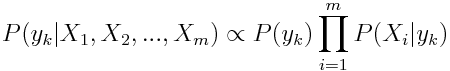

In [92]:
class NaiveBayes:
    def __init__(self):
        """
        Método de inicialização da classe Naive Bayes que não recebe parâmetros
        """
        self._prioris = {}
        self._likelihoods = {}
        self._means = {}
        self._sds = {}
        self._atributesType = []
        self._alfa_ = 0
        self._unique_atributes = {}
        
        self._labels = []
        self._num_labels = -1
        
        self._features = []
        self._num_features = -1
        
        self._label_distribuition = []
        
    def _estimate_frequencies(self, series: pd.Series)->pd.Series:
        """
        Método para o calculo das probalilidades de verossimilhança dos atributos categoricos. Recebe uma Série do Pandas com os rótulos de determinados exemplos
        :param series recebe uma Série do pandas
        :return uma série contendo as estimativas de cada classe.
        """
        serie = (series.value_counts() + self._alfa_) / (series.shape[0] + self._alfa_*self._unique_atributes[series.name])
        return serie
    

    def Fnb(self, x: float, u: float, o: float)-> float:
        """
        Método para o calculo das probalilidades de verossimilhança dos atributos gaussianos. Recebe um float com o valor do atributo, um float com 
        o valor da média do atributo em determinada classe e um float com o desvio padrão do atributo em determinada classe.
        :param x recebe um float com o valor do atributo
        :param u recebe um float com a média do atributo
        :param o recebe um float com o desvio padrão do atributo
        :return retorna um float com a probabilidade de tal classe para determinado atributo
        """
        return (1/np.sqrt(2*np.pi*o**2))*np.exp(-((x-u)**2)/(2*o**2))
    
 
    def fit(self, X: pd.DataFrame, y: pd.Series, tipoAtributos=[], fatorLaplace=1e-10):
        """
        Método para o treinamento para atributos categoricos e Gaussianos.  
        :param X recebe um Dataframe com os exemplos de treinamento
        :param u recebe uma Série com os rótulos das classes dos exemplos de treinamento
        :param tipoAtributos recebe uma lista de caracteres indicando o tipo de dado de cada atributo ("C" para categórico e "N" para numérico)
        :param fatorLaplace recebe um float com o valor do fator de suavização de Laplace
        """
        self._alfa_ =  fatorLaplace
        self._labels = list(y.drop_duplicates())
        self._label_distribuition = y.value_counts()
        self._unique_atributes[y.name] = len(np.unique(y))
        
        # separa os dados de acordo com o tipo
        if(len(tipoAtributos)>0):
            maskCat = [i in ["C"] for i in tipoAtributos]
            maskNum = list(np.invert(maskCat))
            X_cat = X.loc[:, maskCat]
            X_num = X.loc[:, maskNum]
        else:
            maskNum = (X.dtypes == (np.int64)).values + (X.dtypes == (float)).values
            tipoAtributos = ["N" if i else "C" for i in maskNum]
            X_num = X.select_dtypes(['float64', 'int64'])
            X_cat = X.drop(X_num, axis=1)
            
        self._atributesType = tipoAtributos
        self._num_features = X.shape[1]
        self._num_labels = len(self._labels)
        self._prioris = self._estimate_frequencies(y)
        self._features = X.keys().values
        # Guarda as probabilidades dos atributos categoricos para cada classe.
        if (len(X_cat.columns) != 0):
            CatColumns = X_cat.columns.values
            for f in CatColumns:
                self._unique_atributes[f] = len(np.unique(X_cat[f]))
            for label in self._labels:
                subset = X_cat[y == label]
                self._likelihoods[label] = [self._estimate_frequencies(subset[i]) for i in CatColumns]
        
        # Guarda a media e o desvio padrao de cada atributo numerico de acordo com as classes.
        if (len(X_num.columns) != 0):
            for label in self._labels:
                subsetNum = X_num[y == label]
                labels_means = np.mean(subsetNum, axis=0)
                labels_sds = np.std(subsetNum, axis=0)
                self._means[label] = labels_means
                self._sds[label] = labels_sds
        
            
    def _get_likelihood(self, feature: int, value, label: str | int) -> float:
        """
        O método que busca na tabela de probabilidades dos atributos categóricos a probabilidade de determinado valor de um determinado atributo em uma determinada classe.
        :param feature recebe inteiro com índice do atributo desejado no dicionário da classe
        :param value recebe um dado com o valor do atributo desejado
        :param label recebe uma string ou int com o valor da classe desejada
        :return retorna um float com o valor do fator da probabilidade encontrada
        """
        if(value in self._likelihoods[label][feature].index.values):
            return self._likelihoods[label][feature][value]
        return (self._alfa_) / ( self._label_distribuition[label]+ self._alfa_*self._unique_atributes[self._features[feature]])
    
    def predict(self, Xpred: pd.DataFrame):      
        """
        O método que realiza a predição da classe para vários exemplos. Ele recebe um Dataframe com os exemplos e retorna uma lista de rótulos.
        :param Xpred recebe um dataframe com os exemplos de teste
        :return retorna uma lsita de rótulos preditos para os exemplos de teste
        """         
        maskCat = [i in ["C"] for i in self._atributesType]
        maskNum = list(np.invert(maskCat))
        X_cat = Xpred.loc[:, maskCat]
        X_num = Xpred.loc[:, maskNum]
        y_pred = 1
        prob = {}
        # Aprendizado dos atributos Gaussianos.
        if (len(X_num.columns) != 0):
            class_prob_dic = {}
            for label in self._labels:
                mean = self._means[label]
                sd = self._sds[label]
                gaussian = self.Fnb(X_num, mean, sd)
                gaussian = gaussian.prod(axis=1)
                class_prob =gaussian
                class_prob_dic[label] = class_prob
            class_prob_df = pd.DataFrame(class_prob_dic)
            y_pred = y_pred * class_prob_df

        # Aprendizado dos atributos Categoricos.
        y_pred_Cat = pd.DataFrame()
        if (len(X_cat.columns) != 0):
            for ind in X_cat.index:
                for l in range(self._num_labels):
                    label = self._labels[l]
                    this_chance = [self._get_likelihood(i, X_cat.loc[ind][X_cat.keys().values[i]], label) for i in range(X_cat.shape[1])]
                    prob[label] = np.prod(np.array(this_chance))
                y_pred_Cat = pd.concat([y_pred_Cat, pd.DataFrame([prob], index=[ind], columns=self._labels)])
            y_pred = y_pred * y_pred_Cat

        # Calculo do aprendizado com as probabilidades a priore.
        priores = pd.DataFrame([self._prioris.values], columns=self._prioris.keys())
        for l in y_pred.columns.values:
            y_pred[l] = y_pred[l]*priores[l].values[0]

        # Retorna o aprendizado de maior probabilidade
        return y_pred.idxmax(axis=1)

#### Treinamento e Avaliação do Naive Bayes

A seguir será feito treinamento e a avaliação de desempenho dos modelos utilizando os conjuntos de dados apresentados anteriormente e verificando o tempo de predição para comparar a seleção de protótipos.

##### Play Tennis Naive Bayes com Codificação

O treinamento do modelo implementado será com os dados codificados para demonstrar o uso do mesmo tipo de dado de entrada na comparação com o `CategoricalNB`.

In [99]:
nbTennis = NaiveBayes()
nbTennis.fit(XTennisEncPD, ytennisPD)
ypredTennis = nbTennis.predict(XTennisEncPD)

print("############## Agoritmo Naive Bayes ##############\n")
avaliacao(ypredTennis, ytennisPD)


############## Agoritmo Naive Bayes ##############

[[4 1]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      0.80      0.89         5
         Yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

Acurácia: 92.85714285714286 %


In [103]:
nbSKTennis = CategoricalNB()
nbSKTennis.fit(XTennisEncPD, ytennisPD)
ypredSKTennis = nbSKTennis.predict(XTennisEncPD)

print("############## Agoritmo Sklearn ##############\n")
avaliacao(ypredSKTennis, ytennisPD)


############## Agoritmo Sklearn ##############

[[4 1]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      0.80      0.89         5
         Yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

Acurácia: 92.85714285714286 %


##### Play Tennis Naive Bayes com atributos Mistos

In [108]:
nbTennisNum = NaiveBayes()
nbTennisNum.fit(xtennisNumPD, ytennisNumPD, ["C", "N", "N", "C"])
ypredTennisNum = nbTennisNum.predict(xtennisNumPD)

print("############## Agoritmo Naive Bayes ##############\n")
avaliacao(ypredTennisNum, ytennisNumPD)


############## Agoritmo Naive Bayes ##############

[[4 1]
 [0 9]]
              precision    recall  f1-score   support

          No       1.00      0.80      0.89         5
         Yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

Acurácia: 92.85714285714286 %


##### Conjunto Iris

In [104]:
nbIris = NaiveBayes()
nbIris.fit(X_trainIrisPD, y_trainIrisPD)
ypredIris = nbIris.predict(X_testIrisPD)

print("############## Agoritmo Naive Bayes ##############\n")
avaliacao(ypredIris, y_testIrisPD)


############## Agoritmo Naive Bayes ##############

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %


In [105]:
nbSKIris = GaussianNB()
nbSKIris.fit(X_trainIrisPD, y_trainIrisPD)
ypredSKIris = nbSKIris.predict(X_testIrisPD)

print("############## Agoritmo Sklearn ##############\n")
avaliacao(ypredSKIris, y_testIrisPD)


############## Agoritmo Sklearn ##############

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Acurácia: 97.36842105263158 %


##### Conjunto Wine

In [106]:
nbWine = NaiveBayes()
nbWine.fit(X_trainWinePD, y_trainWinePD)
ypredWine = nbWine.predict(X_testWinePD)

print("############## Agoritmo Naive Bayes ##############\n")
avaliacao(ypredWine, y_testWinePD)


############## Agoritmo Naive Bayes ##############

[[15  1  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.95      1.00      0.97        18
     class_2       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Acurácia: 98.14814814814815 %


In [107]:
nbSKWine = GaussianNB()
nbSKWine.fit(X_trainWinePD, y_trainWinePD)
ypredSKWine = nbSKWine.predict(X_testWinePD)

print("############## Agoritmo Sklearn ##############\n")
avaliacao(ypredSKWine, y_testWinePD)


############## Agoritmo Sklearn ##############

[[15  1  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.95      1.00      0.97        18
     class_2       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Acurácia: 98.14814814814815 %


##### Conjunto Câncer de Mama

In [110]:
nbCancer = NaiveBayes()
nbCancer.fit(X_trainCancerPD, y_trainCancerPD)
ypredCancer = nbCancer.predict(X_testCancerPD)

print("############## Agoritmo Naive Bayes ##############\n")
avaliacao(ypredCancer, y_testCancerPD)


############## Agoritmo Naive Bayes ##############

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

      benign       0.96      0.99      0.97        71
   malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Acurácia: 96.49122807017544 %


In [111]:
nbSKCancer = GaussianNB()
nbSKCancer.fit(X_trainCancerPD, y_trainCancerPD)
ypredSKCancer = nbSKCancer.predict(X_testCancerPD)

print("############## Agoritmo Sklearn ##############\n")
avaliacao(ypredSKCancer, y_testCancerPD)


############## Agoritmo Sklearn ##############

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

      benign       0.96      0.99      0.97        71
   malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Acurácia: 96.49122807017544 %


#### Discussão

<div style="text-align: justify">
O algoritmo do Naive Bayes possui um grau de complexidade maior que o K-NN, principalmente por conta da implementação diferenciada para cada tipo de atributo. Como na árvore de decisão, a avaliação do modelo na base Play Tennis é feita com os próprios exemplos de treino por conta da quantidade pequena de exemplos, mas não influênciou muito na acurácia já que foi bem alta. Para o modelo de referência do Naive Bayes é preciso passar os dados codificados pois a função do sklearn não aceita strings, dessa forma o treino na base Play Tennis categórico foi com os dados codificados para os dois modelos. Acurácia em todos os testes foram iguais as obtidas pelo modelo de referência mostrando a eficiência do nosso modelo.
<div>

A passagem de uma lista com o tipo dos atributos como numéricos ou categóricos é uma solução muito boa para a implementação do Naive Bayes misto, contudo para conjuntos de dados com muitos atributos essa lista terá um tamanho bem elevado também. Quando não especificada a tipagem de cada atributo o algoritmo faz uma divisão simples: tudo que for numeral será tratado como atributo numérico, tudo que não for numeral será tratado como atributo categórico, por isso que nos treinos nos conjuntos Iris, Wine e Breast Cancer não foi necessária a especificação do tipoAtributo. Em comparação com os modelos implementados anteriormente, esse foi que possuiu o menor tempo de treino e de predição pois seus cálculos são muito simples, necessitando poucos loops para cada exemplo. 

<div style="text-align: justify">
Os resultados obtidos foram muito além do esperado para o Naive Bayes, devido a dificuldade inicial para identificar e implementar o cálculo para probalidade em atributos numéricos. Contudo, após muita pesquisa o desafio foi contornado. A biblioteca do Pandas foi muito utilizada e auxiliou na redução dos tempos de predição e treino por conta da facilidade de aplicar funções em todo o Dataframe. Dessa forma, foi demonstrado que a manipulação correta das bibliotecas disponíveis são de fundamental importância para um algoritmo mais eficiente e eficaz.
<div>

## Conclusão

O presente trabalho foi realizado a partir dos assuntos abordados na Aprendizagem de Máquina e Mineração de Dados e foi capaz de exercitar e desafiar todos os estudantes envolvidos. O principal desafio encontrado na implementação de cada modelo consistiu em entender como o modelo funciona na teoria, para assim poder avançar no código. A parte da produção apresentou seus problemas, principalmente encontrando as limitações que cada biblioteca possui e tentando contorná-las.  
Todos os modelos obtiveram resultados muito satisfatórios em relação aos modelos de referência, mostrando assim que o objetivo inicial com trabalho foi concluído. Os vários testes com diferentes conjuntos de dados e com quantidade de exemplos variada, evidenciam a flexibildade dos algoritmos e preocupação resolver cada caso de estudo.
Dito isso, este trabalho foi de fundamental importância para agregar os conhecimentos sobre a disciplina para o resto da nossas carreiras.